## Research Project Script 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder as lenc
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from factor_analyzer import FactorAnalyzer, Rotator
from constrained_linear_regression import ConstrainedLinearRegression

In [2]:
df = pd.read_csv('owid-covid-data.csv', index_col = 0)

We are dealing with datetime data so the date column should be of the datetime dtype. 

In [3]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')#%d/%m/%Y
#df['date'] = df['date'].dt.date
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224480 entries, AFG to ZWE
Data columns (total 66 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   continent                                   211586 non-null  object        
 1   location                                    224480 non-null  object        
 2   date                                        224480 non-null  datetime64[ns]
 3   total_cases                                 215304 non-null  float64       
 4   new_cases                                   215039 non-null  float64       
 5   new_cases_smoothed                          213843 non-null  float64       
 6   total_deaths                                196132 non-null  float64       
 7   new_deaths                                  196046 non-null  float64       
 8   new_deaths_smoothed                         194866 non-null  float64       
 9  

We want to work with five countries (United States, Canada, Mexico, Trinidad and Tobago, Jamaica)

In [4]:
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']

df = df[df['location'].isin(Countries)]
df.location.describe()

count       4919
unique         5
top       Mexico
freq        1021
Name: location, dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4919 entries, CAN to USA
Data columns (total 66 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   continent                                   4919 non-null   object        
 1   location                                    4919 non-null   object        
 2   date                                        4919 non-null   datetime64[ns]
 3   total_cases                                 4861 non-null   float64       
 4   new_cases                                   4852 non-null   float64       
 5   new_cases_smoothed                          4827 non-null   float64       
 6   total_deaths                                4738 non-null   float64       
 7   new_deaths                                  4725 non-null   float64       
 8   new_deaths_smoothed                         4700 non-null   float64       
 9   total_cases_

There are a lot of unnecessary variables that can be removed.

In [6]:
df = df[['date', 'location', 'total_deaths_per_million', 'total_cases_per_million', 'stringency_index', 'new_deaths_smoothed', 'new_cases_smoothed', 'new_cases_smoothed_per_million',
         'new_deaths_smoothed_per_million', 'aged_65_older', 'median_age', 'hospital_beds_per_thousand', 'gdp_per_capita', 'people_fully_vaccinated', 'population',
         'cardiovasc_death_rate', 'total_deaths', 'total_cases', 'diabetes_prevalence', 'population_density']]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4919 entries, CAN to USA
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             4919 non-null   datetime64[ns]
 1   location                         4919 non-null   object        
 2   total_deaths_per_million         4738 non-null   float64       
 3   total_cases_per_million          4861 non-null   float64       
 4   stringency_index                 4817 non-null   float64       
 5   new_deaths_smoothed              4700 non-null   float64       
 6   new_cases_smoothed               4827 non-null   float64       
 7   new_cases_smoothed_per_million   4827 non-null   float64       
 8   new_deaths_smoothed_per_million  4700 non-null   float64       
 9   aged_65_older                    4919 non-null   float64       
 10  median_age                       4919 non-null   float64       


Descriptive statistics:

In [8]:
df.describe()

,total_deaths_per_million,total_cases_per_million,stringency_index,new_deaths_smoothed,new_cases_smoothed,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,aged_65_older,median_age,hospital_beds_per_thousand,gdp_per_capita,people_fully_vaccinated,population,cardiovasc_death_rate,total_deaths,total_cases,diabetes_prevalence,population_density
count,4738.000000,4861.000000,4817.000000,4700.000000,4827.000000,4827.000000,4700.000000,4919.000000,4919.00000,4919.000000,4919.000000,2.430000e+03,4.919000e+03,4919.000000,4.738000e+03,4.861000e+03,4919.000000,4919.000000
mean,1103.839333,49632.814711,54.791518,306.531834,22511.653734,130.732856,2.309973,11.808044,35.32281,2.264115,30688.967592,5.715359e+07,1.033982e+08,167.834366,1.640575e+05,9.071248e+06,10.696022,124.881103
std,955.187164,62897.870799,23.707720,567.233546,67010.616993,210.049162,2.525183,3.829658,4.46756,0.625729,16861.494902,7.945750e+07,1.266075e+08,43.464075,2.764560e+05,2.141139e+07,1.868024,114.376481
min,0.003000,0.003000,0.000000,0.000000,0.000000,0.000000,0.000000,6.857000,29.30000,1.380000,8193.571000,1.000000e+00,1.525663e+06,105.599000,1.000000e+00,1.000000e+00,7.370000,4.037000
25%,241.482000,4967.021000,37.960000,3.286000,124.143000,22.788000,0.629000,9.684000,31.40000,1.700000,17336.469000,6.798072e+05,2.827694e+06,151.089000,1.482250e+03,4.739600e+04,10.790000,35.608000
50%,846.217500,29363.149000,64.810000,29.286000,1979.571000,68.810000,1.405000,10.014000,36.20000,2.500000,28763.071000,2.473123e+07,3.815501e+07,152.783000,2.189100e+04,3.703410e+05,10.970000,66.444000
75%,1848.882500,63810.946000,72.220000,401.571000,10115.428500,161.696500,3.339250,15.413000,38.30000,2.770000,44017.591000,7.769432e+07,1.267051e+08,206.537000,2.335420e+05,3.967805e+06,11.280000,266.879000
max,3161.568000,287807.569000,92.590000,3380.429000,806999.571000,2394.674000,19.195000,16.984000,41.40000,3.000000,54225.446000,2.262008e+08,3.369976e+08,228.467000,1.065441e+06,9.699047e+07,13.060000,266.886000


Last day values:

In [9]:
df[df['date']=='2022-9-1']

,date,location,total_deaths_per_million,total_cases_per_million,stringency_index,new_deaths_smoothed,new_cases_smoothed,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,aged_65_older,median_age,hospital_beds_per_thousand,gdp_per_capita,people_fully_vaccinated,population,cardiovasc_death_rate,total_deaths,total_cases,diabetes_prevalence,population_density
iso_code,,,,,,,,,,,,,,,,,,,,
CAN,2022-09-01,Canada,1161.499,110190.294,16.62,44.857,3021.429,79.188,1.176,16.984,41.4,2.50,44017.591,31546300.0,38155012.0,105.599,44317.0,4204312.0,7.37,4.037
JAM,2022-09-01,Jamaica,1150.761,53015.284,11.11,2.143,99.000,35.011,0.758,9.684,31.4,1.70,8193.571,726583.0,2827694.0,206.537,3254.0,149911.0,11.28,266.879
MEX,2022-09-01,Mexico,2600.810,55499.123,19.44,35.286,4347.714,34.314,0.278,6.857,29.3,1.38,17336.469,NaN,126705138.0,152.783,329536.0,7032024.0,13.06,66.444
TTO,2022-09-01,Trinidad and Tobago,2718.818,117488.593,11.11,4.143,203.429,133.338,2.715,10.014,36.2,3.00,28763.071,NaN,1525663.0,228.467,4148.0,179248.0,10.97,266.886
USA,2022-09-01,United States,3107.743,280971.827,24.24,549.857,86848.143,257.711,1.632,15.413,38.3,2.77,54225.446,224727908.0,336997624.0,151.089,1047302.0,94686838.0,10.79,35.608


### Splitting dataset into pre vaccine and post vaccine

We will set post vac with respect to the country's first fully vaccinated report instead of the very first recording worldwide

pre_vac:

In [10]:
usa_pre = df[(df['location']=='United States') & (df['date']<'2020-12-13')]
can_pre = df[(df['location']=='Canada') & (df['date']<'2020-12-22')]
mex_pre = df[(df['location']=='Mexico') & (df['date']<'2021-01-15')]
tri_pre = df[(df['location']=='Trinidad and Tobago') & (df['date']<'2021-05-04')]
jam_pre =df[(df['location']=='Jamaica') & (df['date']<'2021-05-14')]
pre_vac = pd.concat([usa_pre, can_pre, mex_pre, tri_pre, jam_pre], axis=0)

post_vac:

In [11]:
usa_post = df[(df['location']=='United States') & (df['date']>='2020-12-13')]
can_post = df[(df['location']=='Canada') & (df['date']>='2020-12-22')]
mex_post = df[(df['location']=='Mexico') & (df['date']>='2021-01-15')]
tri_post = df[(df['location']=='Trinidad and Tobago') & (df['date']>='2021-05-04')]
jam_post =df[(df['location']=='Jamaica') & (df['date']>='2021-05-14')]
post_vac = pd.concat([usa_post, can_post, mex_post, tri_post, jam_post], axis=0)

#### Handling missing data

In [12]:
pre_vac.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1885 entries, USA to JAM
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             1885 non-null   datetime64[ns]
 1   location                         1885 non-null   object        
 2   total_deaths_per_million         1704 non-null   float64       
 3   total_cases_per_million          1827 non-null   float64       
 4   stringency_index                 1864 non-null   float64       
 5   new_deaths_smoothed              1677 non-null   float64       
 6   new_cases_smoothed               1801 non-null   float64       
 7   new_cases_smoothed_per_million   1801 non-null   float64       
 8   new_deaths_smoothed_per_million  1677 non-null   float64       
 9   aged_65_older                    1885 non-null   float64       
 10  median_age                       1885 non-null   float64       


**no need for vaccinated column now**

In [13]:
pre_vac = pre_vac.drop('people_fully_vaccinated', axis=1)

We handle the post vaccine dataframe first

In [14]:
post_vac.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3034 entries, USA to JAM
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             3034 non-null   datetime64[ns]
 1   location                         3034 non-null   object        
 2   total_deaths_per_million         3034 non-null   float64       
 3   total_cases_per_million          3034 non-null   float64       
 4   stringency_index                 2953 non-null   float64       
 5   new_deaths_smoothed              3023 non-null   float64       
 6   new_cases_smoothed               3026 non-null   float64       
 7   new_cases_smoothed_per_million   3026 non-null   float64       
 8   new_deaths_smoothed_per_million  3023 non-null   float64       
 9   aged_65_older                    3034 non-null   float64       
 10  median_age                       3034 non-null   float64       


In [15]:
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']

for i in Countries:
    post_vac[post_vac['location']==i]['people_fully_vaccinated'].info()

<class 'pandas.core.series.Series'>
Index: 674 entries, USA to USA
Series name: people_fully_vaccinated
Non-Null Count  Dtype  
--------------  -----  
668 non-null    float64
dtypes: float64(1)
memory usage: 10.5+ KB
<class 'pandas.core.series.Series'>
Index: 665 entries, CAN to CAN
Series name: people_fully_vaccinated
Non-Null Count  Dtype  
--------------  -----  
651 non-null    float64
dtypes: float64(1)
memory usage: 10.4+ KB
<class 'pandas.core.series.Series'>
Index: 641 entries, MEX to MEX
Series name: people_fully_vaccinated
Non-Null Count  Dtype  
--------------  -----  
381 non-null    float64
dtypes: float64(1)
memory usage: 10.0+ KB
<class 'pandas.core.series.Series'>
Index: 532 entries, TTO to TTO
Series name: people_fully_vaccinated
Non-Null Count  Dtype  
--------------  -----  
440 non-null    float64
dtypes: float64(1)
memory usage: 8.3+ KB
<class 'pandas.core.series.Series'>
Index: 522 entries, JAM to JAM
Series name: people_fully_vaccinated
Non-Null Count  Dtype  
-

In [16]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**Let's fill TNT first**

In [17]:
#post_vac.loc[(post_vac['location']=='Trinidad and Tobago') & (post_vac['date']<'2021-05-04'), 'people_fully_vaccinated'] = post_vac.loc[(post_vac['location']=='Trinidad and Tobago') & (post_vac['date']<'2021-05-04'), 'people_fully_vaccinated'].fillna(0)


In [18]:
post_vac.loc[(post_vac['location']=='Trinidad and Tobago') & (post_vac['date']>'2022-09-20'), 'people_fully_vaccinated'] = post_vac.loc[(post_vac['location']=='Trinidad and Tobago') & (post_vac['date']>'2022-09-20'), 'people_fully_vaccinated'].fillna(method='ffill')

In [19]:
post_vac.loc[post_vac['location']=='Trinidad and Tobago', 'people_fully_vaccinated'] = post_vac.loc[post_vac['location']=='Trinidad and Tobago', 'people_fully_vaccinated'].interpolate(method='linear')

In [20]:
post_vac[post_vac['location']=='Trinidad and Tobago']['people_fully_vaccinated'].info()

<class 'pandas.core.series.Series'>
Index: 532 entries, TTO to TTO
Series name: people_fully_vaccinated
Non-Null Count  Dtype  
--------------  -----  
532 non-null    float64
dtypes: float64(1)
memory usage: 8.3+ KB


**Let's fill USA next**

In [21]:
post_vac.loc[(post_vac['location']=='United States') & (post_vac['date']>'2022-10-10'), 'people_fully_vaccinated'] = post_vac.loc[(post_vac['location']=='United States') & (post_vac['date']>'2022-10-10'), 'people_fully_vaccinated'].fillna(method='ffill')

In [22]:
post_vac[post_vac['location']=='United States']['people_fully_vaccinated'].info()

<class 'pandas.core.series.Series'>
Index: 674 entries, USA to USA
Series name: people_fully_vaccinated
Non-Null Count  Dtype  
--------------  -----  
674 non-null    float64
dtypes: float64(1)
memory usage: 10.5+ KB


**Let's fill Canada next**

In [23]:
#post_vac.loc[(post_vac['location']=='Canada') & (post_vac['date']<'2020-12-22'), 'people_fully_vaccinated'] = post_vac.loc[(post_vac['location']=='Canada') & (post_vac['date']<'2020-12-22'), 'people_fully_vaccinated'].fillna(0)


In [24]:
post_vac.loc[post_vac['location']=='Canada', 'people_fully_vaccinated'] = post_vac.loc[post_vac['location']=='Canada', 'people_fully_vaccinated'].interpolate(method='linear')

In [25]:
post_vac[post_vac['location']=='Canada']['people_fully_vaccinated'].info()

<class 'pandas.core.series.Series'>
Index: 665 entries, CAN to CAN
Series name: people_fully_vaccinated
Non-Null Count  Dtype  
--------------  -----  
665 non-null    float64
dtypes: float64(1)
memory usage: 10.4+ KB


**Let's do Mexico next**

In [26]:
#post_vac.loc[(post_vac['location']=='Mexico') & (post_vac['date']<'2021-01-15'), 'people_fully_vaccinated'] = post_vac.loc[(post_vac['location']=='Mexico') & (post_vac['date']<'2021-01-15'), 'people_fully_vaccinated'].fillna(0)


In [27]:
post_vac.loc[(post_vac['location']=='Mexico') & (post_vac['date']>'2022-10-06'), 'people_fully_vaccinated'] = post_vac.loc[(post_vac['location']=='Mexico') & (post_vac['date']>'2022-10-06'), 'people_fully_vaccinated'].fillna(method='ffill')

In [28]:
post_vac.loc[post_vac['location']=='Mexico', 'people_fully_vaccinated'] = post_vac.loc[post_vac['location']=='Mexico', 'people_fully_vaccinated'].interpolate(method='linear')

In [29]:
post_vac[post_vac['location']=='Mexico']['people_fully_vaccinated'].info()

<class 'pandas.core.series.Series'>
Index: 641 entries, MEX to MEX
Series name: people_fully_vaccinated
Non-Null Count  Dtype  
--------------  -----  
641 non-null    float64
dtypes: float64(1)
memory usage: 10.0+ KB


**Lastly Jamaica**

In [30]:
#post_vac.loc[(post_vac['location']=='Jamaica') & (post_vac['date']<'2021-05-14'), 'people_fully_vaccinated'] = post_vac.loc[(post_vac['location']=='Jamaica') & (post_vac['date']<'2021-05-14'), 'people_fully_vaccinated'].fillna(0)


In [31]:
post_vac.loc[(post_vac['location']=='Jamaica') & (post_vac['date']>'2022-10-09'), 'people_fully_vaccinated'] = post_vac.loc[(post_vac['location']=='Jamaica') & (post_vac['date']>'2022-10-09'), 'people_fully_vaccinated'].fillna(method='ffill')

In [32]:
post_vac.loc[post_vac['location']=='Jamaica', 'people_fully_vaccinated'] = post_vac.loc[post_vac['location']=='Jamaica', 'people_fully_vaccinated'].interpolate(method='linear')

In [33]:
post_vac[post_vac['location']=='Jamaica']['people_fully_vaccinated'].info()

<class 'pandas.core.series.Series'>
Index: 522 entries, JAM to JAM
Series name: people_fully_vaccinated
Non-Null Count  Dtype  
--------------  -----  
522 non-null    float64
dtypes: float64(1)
memory usage: 8.2+ KB


**All the fully vaccinated rows are now equal in number for the countries**

In [34]:
post_vac.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3034 entries, USA to JAM
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             3034 non-null   datetime64[ns]
 1   location                         3034 non-null   object        
 2   total_deaths_per_million         3034 non-null   float64       
 3   total_cases_per_million          3034 non-null   float64       
 4   stringency_index                 2953 non-null   float64       
 5   new_deaths_smoothed              3023 non-null   float64       
 6   new_cases_smoothed               3026 non-null   float64       
 7   new_cases_smoothed_per_million   3026 non-null   float64       
 8   new_deaths_smoothed_per_million  3023 non-null   float64       
 9   aged_65_older                    3034 non-null   float64       
 10  median_age                       3034 non-null   float64       


**Let's fix stringency index now**

In [35]:
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']

for i in Countries:
    post_vac[post_vac['location']==i]['stringency_index'].info()

<class 'pandas.core.series.Series'>
Index: 674 entries, USA to USA
Series name: stringency_index
Non-Null Count  Dtype  
--------------  -----  
662 non-null    float64
dtypes: float64(1)
memory usage: 10.5+ KB
<class 'pandas.core.series.Series'>
Index: 665 entries, CAN to CAN
Series name: stringency_index
Non-Null Count  Dtype  
--------------  -----  
653 non-null    float64
dtypes: float64(1)
memory usage: 10.4+ KB
<class 'pandas.core.series.Series'>
Index: 641 entries, MEX to MEX
Series name: stringency_index
Non-Null Count  Dtype  
--------------  -----  
623 non-null    float64
dtypes: float64(1)
memory usage: 10.0+ KB
<class 'pandas.core.series.Series'>
Index: 532 entries, TTO to TTO
Series name: stringency_index
Non-Null Count  Dtype  
--------------  -----  
505 non-null    float64
dtypes: float64(1)
memory usage: 8.3+ KB
<class 'pandas.core.series.Series'>
Index: 522 entries, JAM to JAM
Series name: stringency_index
Non-Null Count  Dtype  
--------------  -----  
510 non-null

In [36]:
post_vac.loc[post_vac['location']=='Trinidad and Tobago', 'stringency_index'] = post_vac.loc[post_vac['location']=='Trinidad and Tobago', 'stringency_index'].fillna(method='ffill')

In [37]:
post_vac[post_vac['location']=='Trinidad and Tobago']['stringency_index'].info()

<class 'pandas.core.series.Series'>
Index: 532 entries, TTO to TTO
Series name: stringency_index
Non-Null Count  Dtype  
--------------  -----  
532 non-null    float64
dtypes: float64(1)
memory usage: 8.3+ KB


**USA**

In [38]:
post_vac.loc[post_vac['location']=='United States', 'stringency_index'] = post_vac.loc[post_vac['location']=='United States', 'stringency_index'].fillna(method='ffill')

In [39]:
post_vac[post_vac['location']=='United States']['stringency_index'].info()

<class 'pandas.core.series.Series'>
Index: 674 entries, USA to USA
Series name: stringency_index
Non-Null Count  Dtype  
--------------  -----  
674 non-null    float64
dtypes: float64(1)
memory usage: 10.5+ KB


**Canada**

In [40]:
post_vac.loc[post_vac['location']=='Canada', 'stringency_index'] = post_vac.loc[post_vac['location']=='Canada', 'stringency_index'].fillna(method='ffill')

In [41]:
post_vac[post_vac['location']=='Canada']['stringency_index'].info()

<class 'pandas.core.series.Series'>
Index: 665 entries, CAN to CAN
Series name: stringency_index
Non-Null Count  Dtype  
--------------  -----  
665 non-null    float64
dtypes: float64(1)
memory usage: 10.4+ KB


**Mexico**

In [42]:
post_vac.loc[post_vac['location']=='Mexico', 'stringency_index'] = post_vac.loc[post_vac['location']=='Mexico', 'stringency_index'].fillna(method='ffill')

In [43]:
post_vac[post_vac['location']=='Mexico']['stringency_index'].info()

<class 'pandas.core.series.Series'>
Index: 641 entries, MEX to MEX
Series name: stringency_index
Non-Null Count  Dtype  
--------------  -----  
641 non-null    float64
dtypes: float64(1)
memory usage: 10.0+ KB


**Jamaica**

In [44]:
post_vac.loc[post_vac['location']=='Jamaica', 'stringency_index'] = post_vac.loc[post_vac['location']=='Jamaica', 'stringency_index'].fillna(method='ffill')

In [45]:
post_vac[post_vac['location']=='Jamaica']['stringency_index'].info()

<class 'pandas.core.series.Series'>
Index: 522 entries, JAM to JAM
Series name: stringency_index
Non-Null Count  Dtype  
--------------  -----  
522 non-null    float64
dtypes: float64(1)
memory usage: 8.2+ KB


fix new deaths


In [46]:
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']

for i in Countries:
    post_vac[post_vac['location']==i]['new_deaths_smoothed'].info()

<class 'pandas.core.series.Series'>
Index: 674 entries, USA to USA
Series name: new_deaths_smoothed
Non-Null Count  Dtype  
--------------  -----  
672 non-null    float64
dtypes: float64(1)
memory usage: 10.5+ KB
<class 'pandas.core.series.Series'>
Index: 665 entries, CAN to CAN
Series name: new_deaths_smoothed
Non-Null Count  Dtype  
--------------  -----  
663 non-null    float64
dtypes: float64(1)
memory usage: 10.4+ KB
<class 'pandas.core.series.Series'>
Index: 641 entries, MEX to MEX
Series name: new_deaths_smoothed
Non-Null Count  Dtype  
--------------  -----  
638 non-null    float64
dtypes: float64(1)
memory usage: 10.0+ KB
<class 'pandas.core.series.Series'>
Index: 532 entries, TTO to TTO
Series name: new_deaths_smoothed
Non-Null Count  Dtype  
--------------  -----  
528 non-null    float64
dtypes: float64(1)
memory usage: 8.3+ KB
<class 'pandas.core.series.Series'>
Index: 522 entries, JAM to JAM
Series name: new_deaths_smoothed
Non-Null Count  Dtype  
--------------  -----

In [47]:
post_vac.loc[post_vac['location']=='Trinidad and Tobago', 'new_deaths_smoothed'] = post_vac.loc[post_vac['location']=='Trinidad and Tobago', 'new_deaths_smoothed'].interpolate(method='linear')

In [48]:
post_vac.loc[post_vac['location']=='United States', 'new_deaths_smoothed'] = post_vac.loc[post_vac['location']=='United States', 'new_deaths_smoothed'].interpolate(method='linear')

In [49]:
post_vac.loc[post_vac['location']=='Canada', 'new_deaths_smoothed'] = post_vac.loc[post_vac['location']=='Canada', 'new_deaths_smoothed'].interpolate(method='linear')

In [50]:
post_vac.loc[post_vac['location']=='Mexico', 'new_deaths_smoothed'] = post_vac.loc[post_vac['location']=='Mexico', 'new_deaths_smoothed'].interpolate(method='linear')

In [51]:
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']

for i in Countries:
    post_vac[post_vac['location']==i]['new_deaths_smoothed'].info()

<class 'pandas.core.series.Series'>
Index: 674 entries, USA to USA
Series name: new_deaths_smoothed
Non-Null Count  Dtype  
--------------  -----  
674 non-null    float64
dtypes: float64(1)
memory usage: 10.5+ KB
<class 'pandas.core.series.Series'>
Index: 665 entries, CAN to CAN
Series name: new_deaths_smoothed
Non-Null Count  Dtype  
--------------  -----  
665 non-null    float64
dtypes: float64(1)
memory usage: 10.4+ KB
<class 'pandas.core.series.Series'>
Index: 641 entries, MEX to MEX
Series name: new_deaths_smoothed
Non-Null Count  Dtype  
--------------  -----  
641 non-null    float64
dtypes: float64(1)
memory usage: 10.0+ KB
<class 'pandas.core.series.Series'>
Index: 532 entries, TTO to TTO
Series name: new_deaths_smoothed
Non-Null Count  Dtype  
--------------  -----  
532 non-null    float64
dtypes: float64(1)
memory usage: 8.3+ KB
<class 'pandas.core.series.Series'>
Index: 522 entries, JAM to JAM
Series name: new_deaths_smoothed
Non-Null Count  Dtype  
--------------  -----

now for new cases

In [52]:
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']

for i in Countries:
    post_vac[post_vac['location']==i]['new_cases_smoothed'].info()

<class 'pandas.core.series.Series'>
Index: 674 entries, USA to USA
Series name: new_cases_smoothed
Non-Null Count  Dtype  
--------------  -----  
674 non-null    float64
dtypes: float64(1)
memory usage: 10.5+ KB
<class 'pandas.core.series.Series'>
Index: 665 entries, CAN to CAN
Series name: new_cases_smoothed
Non-Null Count  Dtype  
--------------  -----  
663 non-null    float64
dtypes: float64(1)
memory usage: 10.4+ KB
<class 'pandas.core.series.Series'>
Index: 641 entries, MEX to MEX
Series name: new_cases_smoothed
Non-Null Count  Dtype  
--------------  -----  
639 non-null    float64
dtypes: float64(1)
memory usage: 10.0+ KB
<class 'pandas.core.series.Series'>
Index: 532 entries, TTO to TTO
Series name: new_cases_smoothed
Non-Null Count  Dtype  
--------------  -----  
528 non-null    float64
dtypes: float64(1)
memory usage: 8.3+ KB
<class 'pandas.core.series.Series'>
Index: 522 entries, JAM to JAM
Series name: new_cases_smoothed
Non-Null Count  Dtype  
--------------  -----  
52

In [53]:
post_vac.loc[post_vac['location']=='Trinidad and Tobago', 'new_cases_smoothed'] = post_vac.loc[post_vac['location']=='Trinidad and Tobago', 'new_cases_smoothed'].interpolate(method='linear')

In [54]:
post_vac.loc[post_vac['location']=='Canada', 'new_cases_smoothed'] = post_vac.loc[post_vac['location']=='Canada', 'new_cases_smoothed'].interpolate(method='linear')

In [55]:
post_vac.loc[post_vac['location']=='Mexico', 'new_cases_smoothed'] = post_vac.loc[post_vac['location']=='Mexico', 'new_cases_smoothed'].interpolate(method='linear')

In [56]:
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']

for i in Countries:
    post_vac[post_vac['location']==i]['new_cases_smoothed'].info()

<class 'pandas.core.series.Series'>
Index: 674 entries, USA to USA
Series name: new_cases_smoothed
Non-Null Count  Dtype  
--------------  -----  
674 non-null    float64
dtypes: float64(1)
memory usage: 10.5+ KB
<class 'pandas.core.series.Series'>
Index: 665 entries, CAN to CAN
Series name: new_cases_smoothed
Non-Null Count  Dtype  
--------------  -----  
665 non-null    float64
dtypes: float64(1)
memory usage: 10.4+ KB
<class 'pandas.core.series.Series'>
Index: 641 entries, MEX to MEX
Series name: new_cases_smoothed
Non-Null Count  Dtype  
--------------  -----  
641 non-null    float64
dtypes: float64(1)
memory usage: 10.0+ KB
<class 'pandas.core.series.Series'>
Index: 532 entries, TTO to TTO
Series name: new_cases_smoothed
Non-Null Count  Dtype  
--------------  -----  
532 non-null    float64
dtypes: float64(1)
memory usage: 8.3+ KB
<class 'pandas.core.series.Series'>
Index: 522 entries, JAM to JAM
Series name: new_cases_smoothed
Non-Null Count  Dtype  
--------------  -----  
52

new_deaths_per_million

In [57]:
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']

for i in Countries:
    post_vac[post_vac['location']==i]['new_deaths_smoothed_per_million'].info()

<class 'pandas.core.series.Series'>
Index: 674 entries, USA to USA
Series name: new_deaths_smoothed_per_million
Non-Null Count  Dtype  
--------------  -----  
672 non-null    float64
dtypes: float64(1)
memory usage: 10.5+ KB
<class 'pandas.core.series.Series'>
Index: 665 entries, CAN to CAN
Series name: new_deaths_smoothed_per_million
Non-Null Count  Dtype  
--------------  -----  
663 non-null    float64
dtypes: float64(1)
memory usage: 10.4+ KB
<class 'pandas.core.series.Series'>
Index: 641 entries, MEX to MEX
Series name: new_deaths_smoothed_per_million
Non-Null Count  Dtype  
--------------  -----  
638 non-null    float64
dtypes: float64(1)
memory usage: 10.0+ KB
<class 'pandas.core.series.Series'>
Index: 532 entries, TTO to TTO
Series name: new_deaths_smoothed_per_million
Non-Null Count  Dtype  
--------------  -----  
528 non-null    float64
dtypes: float64(1)
memory usage: 8.3+ KB
<class 'pandas.core.series.Series'>
Index: 522 entries, JAM to JAM
Series name: new_deaths_smooth

In [58]:
post_vac.loc[post_vac['location']=='Trinidad and Tobago', 'new_deaths_smoothed_per_million'] = post_vac.loc[post_vac['location']=='Trinidad and Tobago', 'new_deaths_smoothed_per_million'].interpolate(method='linear')

In [59]:
post_vac.loc[post_vac['location']=='United States', 'new_deaths_smoothed_per_million'] = post_vac.loc[post_vac['location']=='United States', 'new_deaths_smoothed_per_million'].interpolate(method='linear')

In [60]:
post_vac.loc[post_vac['location']=='Canada', 'new_deaths_smoothed_per_million'] = post_vac.loc[post_vac['location']=='Canada', 'new_deaths_smoothed_per_million'].interpolate(method='linear')

In [61]:
post_vac.loc[post_vac['location']=='Mexico', 'new_deaths_smoothed_per_million'] = post_vac.loc[post_vac['location']=='Mexico', 'new_deaths_smoothed_per_million'].interpolate(method='linear')

In [62]:
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']

for i in Countries:
    post_vac[post_vac['location']==i]['new_deaths_smoothed_per_million'].info()

<class 'pandas.core.series.Series'>
Index: 674 entries, USA to USA
Series name: new_deaths_smoothed_per_million
Non-Null Count  Dtype  
--------------  -----  
674 non-null    float64
dtypes: float64(1)
memory usage: 10.5+ KB
<class 'pandas.core.series.Series'>
Index: 665 entries, CAN to CAN
Series name: new_deaths_smoothed_per_million
Non-Null Count  Dtype  
--------------  -----  
665 non-null    float64
dtypes: float64(1)
memory usage: 10.4+ KB
<class 'pandas.core.series.Series'>
Index: 641 entries, MEX to MEX
Series name: new_deaths_smoothed_per_million
Non-Null Count  Dtype  
--------------  -----  
641 non-null    float64
dtypes: float64(1)
memory usage: 10.0+ KB
<class 'pandas.core.series.Series'>
Index: 532 entries, TTO to TTO
Series name: new_deaths_smoothed_per_million
Non-Null Count  Dtype  
--------------  -----  
532 non-null    float64
dtypes: float64(1)
memory usage: 8.3+ KB
<class 'pandas.core.series.Series'>
Index: 522 entries, JAM to JAM
Series name: new_deaths_smooth

new cases per million

In [63]:
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']

for i in Countries:
    post_vac[post_vac['location']==i]['new_cases_smoothed_per_million'].info()

<class 'pandas.core.series.Series'>
Index: 674 entries, USA to USA
Series name: new_cases_smoothed_per_million
Non-Null Count  Dtype  
--------------  -----  
674 non-null    float64
dtypes: float64(1)
memory usage: 10.5+ KB
<class 'pandas.core.series.Series'>
Index: 665 entries, CAN to CAN
Series name: new_cases_smoothed_per_million
Non-Null Count  Dtype  
--------------  -----  
663 non-null    float64
dtypes: float64(1)
memory usage: 10.4+ KB
<class 'pandas.core.series.Series'>
Index: 641 entries, MEX to MEX
Series name: new_cases_smoothed_per_million
Non-Null Count  Dtype  
--------------  -----  
639 non-null    float64
dtypes: float64(1)
memory usage: 10.0+ KB
<class 'pandas.core.series.Series'>
Index: 532 entries, TTO to TTO
Series name: new_cases_smoothed_per_million
Non-Null Count  Dtype  
--------------  -----  
528 non-null    float64
dtypes: float64(1)
memory usage: 8.3+ KB
<class 'pandas.core.series.Series'>
Index: 522 entries, JAM to JAM
Series name: new_cases_smoothed_pe

In [64]:
post_vac.loc[post_vac['location']=='Trinidad and Tobago', 'new_cases_smoothed_per_million'] = post_vac.loc[post_vac['location']=='Trinidad and Tobago', 'new_cases_smoothed_per_million'].interpolate(method='linear')

In [65]:
post_vac.loc[post_vac['location']=='Canada', 'new_cases_smoothed_per_million'] = post_vac.loc[post_vac['location']=='Canada', 'new_cases_smoothed_per_million'].interpolate(method='linear')

In [66]:
post_vac.loc[post_vac['location']=='Mexico', 'new_cases_smoothed_per_million'] = post_vac.loc[post_vac['location']=='Mexico', 'new_cases_smoothed_per_million'].interpolate(method='linear')

In [67]:
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']

for i in Countries:
    post_vac[post_vac['location']==i]['new_cases_smoothed_per_million'].info()

<class 'pandas.core.series.Series'>
Index: 674 entries, USA to USA
Series name: new_cases_smoothed_per_million
Non-Null Count  Dtype  
--------------  -----  
674 non-null    float64
dtypes: float64(1)
memory usage: 10.5+ KB
<class 'pandas.core.series.Series'>
Index: 665 entries, CAN to CAN
Series name: new_cases_smoothed_per_million
Non-Null Count  Dtype  
--------------  -----  
665 non-null    float64
dtypes: float64(1)
memory usage: 10.4+ KB
<class 'pandas.core.series.Series'>
Index: 641 entries, MEX to MEX
Series name: new_cases_smoothed_per_million
Non-Null Count  Dtype  
--------------  -----  
641 non-null    float64
dtypes: float64(1)
memory usage: 10.0+ KB
<class 'pandas.core.series.Series'>
Index: 532 entries, TTO to TTO
Series name: new_cases_smoothed_per_million
Non-Null Count  Dtype  
--------------  -----  
532 non-null    float64
dtypes: float64(1)
memory usage: 8.3+ KB
<class 'pandas.core.series.Series'>
Index: 522 entries, JAM to JAM
Series name: new_cases_smoothed_pe

In [68]:
post_vac.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3034 entries, USA to JAM
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             3034 non-null   datetime64[ns]
 1   location                         3034 non-null   object        
 2   total_deaths_per_million         3034 non-null   float64       
 3   total_cases_per_million          3034 non-null   float64       
 4   stringency_index                 3034 non-null   float64       
 5   new_deaths_smoothed              3034 non-null   float64       
 6   new_cases_smoothed               3034 non-null   float64       
 7   new_cases_smoothed_per_million   3034 non-null   float64       
 8   new_deaths_smoothed_per_million  3034 non-null   float64       
 9   aged_65_older                    3034 non-null   float64       
 10  median_age                       3034 non-null   float64       


**post_vac is now fully finished**

- pre_vac needs some cleaning now

In [69]:
pre_vac.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1885 entries, USA to JAM
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             1885 non-null   datetime64[ns]
 1   location                         1885 non-null   object        
 2   total_deaths_per_million         1704 non-null   float64       
 3   total_cases_per_million          1827 non-null   float64       
 4   stringency_index                 1864 non-null   float64       
 5   new_deaths_smoothed              1677 non-null   float64       
 6   new_cases_smoothed               1801 non-null   float64       
 7   new_cases_smoothed_per_million   1801 non-null   float64       
 8   new_deaths_smoothed_per_million  1677 non-null   float64       
 9   aged_65_older                    1885 non-null   float64       
 10  median_age                       1885 non-null   float64       


In [70]:
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']

for i in Countries:
    pre_vac[pre_vac['location']==i]['stringency_index'].info()

<class 'pandas.core.series.Series'>
Index: 326 entries, USA to USA
Series name: stringency_index
Non-Null Count  Dtype  
--------------  -----  
326 non-null    float64
dtypes: float64(1)
memory usage: 5.1+ KB
<class 'pandas.core.series.Series'>
Index: 334 entries, CAN to CAN
Series name: stringency_index
Non-Null Count  Dtype  
--------------  -----  
334 non-null    float64
dtypes: float64(1)
memory usage: 5.2+ KB
<class 'pandas.core.series.Series'>
Index: 380 entries, MEX to MEX
Series name: stringency_index
Non-Null Count  Dtype  
--------------  -----  
359 non-null    float64
dtypes: float64(1)
memory usage: 5.9+ KB
<class 'pandas.core.series.Series'>
Index: 416 entries, TTO to TTO
Series name: stringency_index
Non-Null Count  Dtype  
--------------  -----  
416 non-null    float64
dtypes: float64(1)
memory usage: 6.5+ KB
<class 'pandas.core.series.Series'>
Index: 429 entries, JAM to JAM
Series name: stringency_index
Non-Null Count  Dtype  
--------------  -----  
429 non-null   

In [71]:
pre_vac.loc[pre_vac['location']=='Mexico', 'stringency_index'] = pre_vac.loc[pre_vac['location']=='Mexico', 'stringency_index'].fillna(0)

In [72]:
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']

for i in Countries:
    pre_vac[pre_vac['location']==i]['stringency_index'].info()

<class 'pandas.core.series.Series'>
Index: 326 entries, USA to USA
Series name: stringency_index
Non-Null Count  Dtype  
--------------  -----  
326 non-null    float64
dtypes: float64(1)
memory usage: 5.1+ KB
<class 'pandas.core.series.Series'>
Index: 334 entries, CAN to CAN
Series name: stringency_index
Non-Null Count  Dtype  
--------------  -----  
334 non-null    float64
dtypes: float64(1)
memory usage: 5.2+ KB
<class 'pandas.core.series.Series'>
Index: 380 entries, MEX to MEX
Series name: stringency_index
Non-Null Count  Dtype  
--------------  -----  
380 non-null    float64
dtypes: float64(1)
memory usage: 5.9+ KB
<class 'pandas.core.series.Series'>
Index: 416 entries, TTO to TTO
Series name: stringency_index
Non-Null Count  Dtype  
--------------  -----  
416 non-null    float64
dtypes: float64(1)
memory usage: 6.5+ KB
<class 'pandas.core.series.Series'>
Index: 429 entries, JAM to JAM
Series name: stringency_index
Non-Null Count  Dtype  
--------------  -----  
429 non-null   

let's fix total deaths now


In [73]:
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']

for i in Countries:
    pre_vac[pre_vac['location']==i]['total_deaths'].info()

<class 'pandas.core.series.Series'>
Index: 326 entries, USA to USA
Series name: total_deaths
Non-Null Count  Dtype  
--------------  -----  
288 non-null    float64
dtypes: float64(1)
memory usage: 5.1+ KB
<class 'pandas.core.series.Series'>
Index: 334 entries, CAN to CAN
Series name: total_deaths
Non-Null Count  Dtype  
--------------  -----  
288 non-null    float64
dtypes: float64(1)
memory usage: 5.2+ KB
<class 'pandas.core.series.Series'>
Index: 380 entries, MEX to MEX
Series name: total_deaths
Non-Null Count  Dtype  
--------------  -----  
302 non-null    float64
dtypes: float64(1)
memory usage: 5.9+ KB
<class 'pandas.core.series.Series'>
Index: 416 entries, TTO to TTO
Series name: total_deaths
Non-Null Count  Dtype  
--------------  -----  
405 non-null    float64
dtypes: float64(1)
memory usage: 6.5+ KB
<class 'pandas.core.series.Series'>
Index: 429 entries, JAM to JAM
Series name: total_deaths
Non-Null Count  Dtype  
--------------  -----  
421 non-null    float64
dtypes: flo

In [74]:
pre_vac.loc[pre_vac['location']=='United States', 'total_deaths'] = pre_vac.loc[pre_vac['location']=='United States', 'total_deaths'].fillna(0)
pre_vac.loc[pre_vac['location']=='Canada', 'total_deaths'] = pre_vac.loc[pre_vac['location']=='Canada', 'total_deaths'].fillna(0)
pre_vac.loc[pre_vac['location']=='Mexico', 'total_deaths'] = pre_vac.loc[pre_vac['location']=='Mexico', 'total_deaths'].fillna(0)
pre_vac.loc[pre_vac['location']=='Trinidad and Tobago', 'total_deaths'] = pre_vac.loc[pre_vac['location']=='Trinidad and Tobago', 'total_deaths'].fillna(0)
pre_vac.loc[pre_vac['location']=='Jamaica', 'total_deaths'] = pre_vac.loc[pre_vac['location']=='Jamaica', 'total_deaths'].fillna(0)

total deaths per million now

In [75]:
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']

for i in Countries:
    pre_vac[pre_vac['location']==i]['total_deaths_per_million'].info()

<class 'pandas.core.series.Series'>
Index: 326 entries, USA to USA
Series name: total_deaths_per_million
Non-Null Count  Dtype  
--------------  -----  
288 non-null    float64
dtypes: float64(1)
memory usage: 5.1+ KB
<class 'pandas.core.series.Series'>
Index: 334 entries, CAN to CAN
Series name: total_deaths_per_million
Non-Null Count  Dtype  
--------------  -----  
288 non-null    float64
dtypes: float64(1)
memory usage: 5.2+ KB
<class 'pandas.core.series.Series'>
Index: 380 entries, MEX to MEX
Series name: total_deaths_per_million
Non-Null Count  Dtype  
--------------  -----  
302 non-null    float64
dtypes: float64(1)
memory usage: 5.9+ KB
<class 'pandas.core.series.Series'>
Index: 416 entries, TTO to TTO
Series name: total_deaths_per_million
Non-Null Count  Dtype  
--------------  -----  
405 non-null    float64
dtypes: float64(1)
memory usage: 6.5+ KB
<class 'pandas.core.series.Series'>
Index: 429 entries, JAM to JAM
Series name: total_deaths_per_million
Non-Null Count  Dtype  

In [76]:
pre_vac.loc[pre_vac['location']=='United States', 'total_deaths_per_million'] = pre_vac.loc[pre_vac['location']=='United States', 'total_deaths_per_million'].fillna(0)
pre_vac.loc[pre_vac['location']=='Canada', 'total_deaths_per_million'] = pre_vac.loc[pre_vac['location']=='Canada', 'total_deaths_per_million'].fillna(0)
pre_vac.loc[pre_vac['location']=='Mexico', 'total_deaths_per_million'] = pre_vac.loc[pre_vac['location']=='Mexico', 'total_deaths_per_million'].fillna(0)
pre_vac.loc[pre_vac['location']=='Trinidad and Tobago', 'total_deaths_per_million'] = pre_vac.loc[pre_vac['location']=='Trinidad and Tobago', 'total_deaths_per_million'].fillna(0)
pre_vac.loc[pre_vac['location']=='Jamaica', 'total_deaths_per_million'] = pre_vac.loc[pre_vac['location']=='Jamaica', 'total_deaths_per_million'].fillna(0)

In [77]:
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']

for i in Countries:
    pre_vac[pre_vac['location']==i]['total_deaths_per_million'].info()

<class 'pandas.core.series.Series'>
Index: 326 entries, USA to USA
Series name: total_deaths_per_million
Non-Null Count  Dtype  
--------------  -----  
326 non-null    float64
dtypes: float64(1)
memory usage: 5.1+ KB
<class 'pandas.core.series.Series'>
Index: 334 entries, CAN to CAN
Series name: total_deaths_per_million
Non-Null Count  Dtype  
--------------  -----  
334 non-null    float64
dtypes: float64(1)
memory usage: 5.2+ KB
<class 'pandas.core.series.Series'>
Index: 380 entries, MEX to MEX
Series name: total_deaths_per_million
Non-Null Count  Dtype  
--------------  -----  
380 non-null    float64
dtypes: float64(1)
memory usage: 5.9+ KB
<class 'pandas.core.series.Series'>
Index: 416 entries, TTO to TTO
Series name: total_deaths_per_million
Non-Null Count  Dtype  
--------------  -----  
416 non-null    float64
dtypes: float64(1)
memory usage: 6.5+ KB
<class 'pandas.core.series.Series'>
Index: 429 entries, JAM to JAM
Series name: total_deaths_per_million
Non-Null Count  Dtype  

new cases now

In [78]:
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']

for i in Countries:
    pre_vac[pre_vac['location']==i]['new_cases_smoothed'].info()

<class 'pandas.core.series.Series'>
Index: 326 entries, USA to USA
Series name: new_cases_smoothed
Non-Null Count  Dtype  
--------------  -----  
320 non-null    float64
dtypes: float64(1)
memory usage: 5.1+ KB
<class 'pandas.core.series.Series'>
Index: 334 entries, CAN to CAN
Series name: new_cases_smoothed
Non-Null Count  Dtype  
--------------  -----  
329 non-null    float64
dtypes: float64(1)
memory usage: 5.2+ KB
<class 'pandas.core.series.Series'>
Index: 380 entries, MEX to MEX
Series name: new_cases_smoothed
Non-Null Count  Dtype  
--------------  -----  
317 non-null    float64
dtypes: float64(1)
memory usage: 5.9+ KB
<class 'pandas.core.series.Series'>
Index: 416 entries, TTO to TTO
Series name: new_cases_smoothed
Non-Null Count  Dtype  
--------------  -----  
411 non-null    float64
dtypes: float64(1)
memory usage: 6.5+ KB
<class 'pandas.core.series.Series'>
Index: 429 entries, JAM to JAM
Series name: new_cases_smoothed
Non-Null Count  Dtype  
--------------  -----  
424 n

since mexico is the only country with nan in the new_cases column we use this

In [79]:
pre_vac = pre_vac.dropna(subset='new_cases_smoothed')
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']

for i in Countries:
    pre_vac[pre_vac['location']==i]['new_cases_smoothed'].info()

<class 'pandas.core.series.Series'>
Index: 320 entries, USA to USA
Series name: new_cases_smoothed
Non-Null Count  Dtype  
--------------  -----  
320 non-null    float64
dtypes: float64(1)
memory usage: 5.0+ KB
<class 'pandas.core.series.Series'>
Index: 329 entries, CAN to CAN
Series name: new_cases_smoothed
Non-Null Count  Dtype  
--------------  -----  
329 non-null    float64
dtypes: float64(1)
memory usage: 5.1+ KB
<class 'pandas.core.series.Series'>
Index: 317 entries, MEX to MEX
Series name: new_cases_smoothed
Non-Null Count  Dtype  
--------------  -----  
317 non-null    float64
dtypes: float64(1)
memory usage: 5.0+ KB
<class 'pandas.core.series.Series'>
Index: 411 entries, TTO to TTO
Series name: new_cases_smoothed
Non-Null Count  Dtype  
--------------  -----  
411 non-null    float64
dtypes: float64(1)
memory usage: 6.4+ KB
<class 'pandas.core.series.Series'>
Index: 424 entries, JAM to JAM
Series name: new_cases_smoothed
Non-Null Count  Dtype  
--------------  -----  
424 n

new cases per million now

In [80]:
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']

for i in Countries:
    pre_vac[pre_vac['location']==i]['new_cases_smoothed_per_million'].info()

<class 'pandas.core.series.Series'>
Index: 320 entries, USA to USA
Series name: new_cases_smoothed_per_million
Non-Null Count  Dtype  
--------------  -----  
320 non-null    float64
dtypes: float64(1)
memory usage: 5.0+ KB
<class 'pandas.core.series.Series'>
Index: 329 entries, CAN to CAN
Series name: new_cases_smoothed_per_million
Non-Null Count  Dtype  
--------------  -----  
329 non-null    float64
dtypes: float64(1)
memory usage: 5.1+ KB
<class 'pandas.core.series.Series'>
Index: 317 entries, MEX to MEX
Series name: new_cases_smoothed_per_million
Non-Null Count  Dtype  
--------------  -----  
317 non-null    float64
dtypes: float64(1)
memory usage: 5.0+ KB
<class 'pandas.core.series.Series'>
Index: 411 entries, TTO to TTO
Series name: new_cases_smoothed_per_million
Non-Null Count  Dtype  
--------------  -----  
411 non-null    float64
dtypes: float64(1)
memory usage: 6.4+ KB
<class 'pandas.core.series.Series'>
Index: 424 entries, JAM to JAM
Series name: new_cases_smoothed_per_m

total cases

In [81]:
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']

for i in Countries:
    pre_vac[pre_vac['location']==i]['total_cases'].info()

<class 'pandas.core.series.Series'>
Index: 320 entries, USA to USA
Series name: total_cases
Non-Null Count  Dtype  
--------------  -----  
320 non-null    float64
dtypes: float64(1)
memory usage: 5.0+ KB
<class 'pandas.core.series.Series'>
Index: 329 entries, CAN to CAN
Series name: total_cases
Non-Null Count  Dtype  
--------------  -----  
329 non-null    float64
dtypes: float64(1)
memory usage: 5.1+ KB
<class 'pandas.core.series.Series'>
Index: 317 entries, MEX to MEX
Series name: total_cases
Non-Null Count  Dtype  
--------------  -----  
317 non-null    float64
dtypes: float64(1)
memory usage: 5.0+ KB
<class 'pandas.core.series.Series'>
Index: 411 entries, TTO to TTO
Series name: total_cases
Non-Null Count  Dtype  
--------------  -----  
411 non-null    float64
dtypes: float64(1)
memory usage: 6.4+ KB
<class 'pandas.core.series.Series'>
Index: 424 entries, JAM to JAM
Series name: total_cases
Non-Null Count  Dtype  
--------------  -----  
424 non-null    float64
dtypes: float64(

total cases per million

In [82]:
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']

for i in Countries:
    pre_vac[pre_vac['location']==i]['total_cases_per_million'].info()

<class 'pandas.core.series.Series'>
Index: 320 entries, USA to USA
Series name: total_cases_per_million
Non-Null Count  Dtype  
--------------  -----  
320 non-null    float64
dtypes: float64(1)
memory usage: 5.0+ KB
<class 'pandas.core.series.Series'>
Index: 329 entries, CAN to CAN
Series name: total_cases_per_million
Non-Null Count  Dtype  
--------------  -----  
329 non-null    float64
dtypes: float64(1)
memory usage: 5.1+ KB
<class 'pandas.core.series.Series'>
Index: 317 entries, MEX to MEX
Series name: total_cases_per_million
Non-Null Count  Dtype  
--------------  -----  
317 non-null    float64
dtypes: float64(1)
memory usage: 5.0+ KB
<class 'pandas.core.series.Series'>
Index: 411 entries, TTO to TTO
Series name: total_cases_per_million
Non-Null Count  Dtype  
--------------  -----  
411 non-null    float64
dtypes: float64(1)
memory usage: 6.4+ KB
<class 'pandas.core.series.Series'>
Index: 424 entries, JAM to JAM
Series name: total_cases_per_million
Non-Null Count  Dtype  
----

new_deaths

In [83]:
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']

for i in Countries:
    pre_vac[pre_vac['location']==i]['new_deaths_smoothed'].info()

<class 'pandas.core.series.Series'>
Index: 320 entries, USA to USA
Series name: new_deaths_smoothed
Non-Null Count  Dtype  
--------------  -----  
283 non-null    float64
dtypes: float64(1)
memory usage: 5.0+ KB
<class 'pandas.core.series.Series'>
Index: 329 entries, CAN to CAN
Series name: new_deaths_smoothed
Non-Null Count  Dtype  
--------------  -----  
282 non-null    float64
dtypes: float64(1)
memory usage: 5.1+ KB
<class 'pandas.core.series.Series'>
Index: 317 entries, MEX to MEX
Series name: new_deaths_smoothed
Non-Null Count  Dtype  
--------------  -----  
296 non-null    float64
dtypes: float64(1)
memory usage: 5.0+ KB
<class 'pandas.core.series.Series'>
Index: 411 entries, TTO to TTO
Series name: new_deaths_smoothed
Non-Null Count  Dtype  
--------------  -----  
400 non-null    float64
dtypes: float64(1)
memory usage: 6.4+ KB
<class 'pandas.core.series.Series'>
Index: 424 entries, JAM to JAM
Series name: new_deaths_smoothed
Non-Null Count  Dtype  
--------------  -----  


In [84]:
pre_vac.loc[pre_vac['location']=='United States', 'new_deaths_smoothed'] = pre_vac.loc[pre_vac['location']=='United States', 'new_deaths_smoothed'].fillna(0)
pre_vac.loc[pre_vac['location']=='Canada', 'new_deaths_smoothed'] = pre_vac.loc[pre_vac['location']=='Canada', 'new_deaths_smoothed'].fillna(0)
pre_vac.loc[pre_vac['location']=='Mexico', 'new_deaths_smoothed'] = pre_vac.loc[pre_vac['location']=='Mexico', 'new_deaths_smoothed'].fillna(0)
pre_vac.loc[pre_vac['location']=='Trinidad and Tobago', 'new_deaths_smoothed'] = pre_vac.loc[pre_vac['location']=='Trinidad and Tobago', 'new_deaths_smoothed'].fillna(0)
pre_vac.loc[pre_vac['location']=='Jamaica', 'new_deaths_smoothed'] = pre_vac.loc[pre_vac['location']=='Jamaica', 'new_deaths_smoothed'].fillna(0)

new_deaths_per_million

In [85]:
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']

for i in Countries:
    pre_vac[pre_vac['location']==i]['new_deaths_smoothed_per_million'].info()

<class 'pandas.core.series.Series'>
Index: 320 entries, USA to USA
Series name: new_deaths_smoothed_per_million
Non-Null Count  Dtype  
--------------  -----  
283 non-null    float64
dtypes: float64(1)
memory usage: 5.0+ KB
<class 'pandas.core.series.Series'>
Index: 329 entries, CAN to CAN
Series name: new_deaths_smoothed_per_million
Non-Null Count  Dtype  
--------------  -----  
282 non-null    float64
dtypes: float64(1)
memory usage: 5.1+ KB
<class 'pandas.core.series.Series'>
Index: 317 entries, MEX to MEX
Series name: new_deaths_smoothed_per_million
Non-Null Count  Dtype  
--------------  -----  
296 non-null    float64
dtypes: float64(1)
memory usage: 5.0+ KB
<class 'pandas.core.series.Series'>
Index: 411 entries, TTO to TTO
Series name: new_deaths_smoothed_per_million
Non-Null Count  Dtype  
--------------  -----  
400 non-null    float64
dtypes: float64(1)
memory usage: 6.4+ KB
<class 'pandas.core.series.Series'>
Index: 424 entries, JAM to JAM
Series name: new_deaths_smoothed_

In [86]:
pre_vac.loc[pre_vac['location']=='United States', 'new_deaths_smoothed_per_million'] = pre_vac.loc[pre_vac['location']=='United States', 'new_deaths_smoothed_per_million'].fillna(0)
pre_vac.loc[pre_vac['location']=='Canada', 'new_deaths_smoothed_per_million'] = pre_vac.loc[pre_vac['location']=='Canada', 'new_deaths_smoothed_per_million'].fillna(0)
pre_vac.loc[pre_vac['location']=='Mexico', 'new_deaths_smoothed_per_million'] = pre_vac.loc[pre_vac['location']=='Mexico', 'new_deaths_smoothed_per_million'].fillna(0)
pre_vac.loc[pre_vac['location']=='Trinidad and Tobago', 'new_deaths_smoothed_per_million'] = pre_vac.loc[pre_vac['location']=='Trinidad and Tobago', 'new_deaths_smoothed_per_million'].fillna(0)
pre_vac.loc[pre_vac['location']=='Jamaica', 'new_deaths_smoothed_per_million'] = pre_vac.loc[pre_vac['location']=='Jamaica', 'new_deaths_smoothed_per_million'].fillna(0)

In [87]:
pre_vac.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1801 entries, USA to JAM
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             1801 non-null   datetime64[ns]
 1   location                         1801 non-null   object        
 2   total_deaths_per_million         1801 non-null   float64       
 3   total_cases_per_million          1801 non-null   float64       
 4   stringency_index                 1801 non-null   float64       
 5   new_deaths_smoothed              1801 non-null   float64       
 6   new_cases_smoothed               1801 non-null   float64       
 7   new_cases_smoothed_per_million   1801 non-null   float64       
 8   new_deaths_smoothed_per_million  1801 non-null   float64       
 9   aged_65_older                    1801 non-null   float64       
 10  median_age                       1801 non-null   float64       


we equalised all the rows in pre_vac

**Let's also make a proportion of population vaccinated column**

In [88]:
post_vac['proportion_vaccinated'] = post_vac['people_fully_vaccinated']/post_vac['population']

### Descriptive statistics for the two dataframes

pre_vac:

In [89]:
pre_vac.describe()

,total_deaths_per_million,total_cases_per_million,stringency_index,new_deaths_smoothed,new_cases_smoothed,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,aged_65_older,median_age,hospital_beds_per_thousand,gdp_per_capita,population,cardiovasc_death_rate,total_deaths,total_cases,diabetes_prevalence,population_density
count,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1.801000e+03,1801.000000,1801.000000,1.801000e+03,1801.000000,1801.000000
mean,202.505752,5239.934926,67.701477,244.028821,9816.118987,52.844626,1.485388,11.613179,35.178512,2.276602,29220.037267,9.016311e+07,173.789221,33218.480289,8.885316e+05,10.721233,142.494349
std,245.670962,7163.170908,17.533496,448.763104,27570.554979,83.377918,1.755943,3.644679,4.300482,0.625922,16740.416921,1.230922e+08,44.209413,63375.850126,2.390733e+06,1.761973,117.179461
min,0.000000,0.015000,0.000000,0.000000,0.000000,0.000000,0.000000,6.857000,29.300000,1.380000,8193.571000,1.525663e+06,105.599000,0.000000,4.000000e+00,7.370000,4.037000
25%,5.244000,264.803000,66.200000,0.143000,14.857000,4.682000,0.094000,9.684000,31.400000,1.700000,17336.469000,2.827694e+06,151.089000,20.000000,1.586000e+03,10.790000,35.608000
50%,93.074000,3349.726000,71.300000,3.857000,232.857000,27.375000,0.655000,10.014000,36.200000,2.500000,28763.071000,3.815501e+07,152.783000,358.000000,1.515300e+04,10.970000,66.444000
75%,277.258000,6005.476000,74.540000,404.714000,5158.286000,64.609000,2.535000,15.413000,38.300000,2.770000,44017.591000,1.267051e+08,206.537000,24324.000000,3.703410e+05,11.280000,266.879000
max,1088.480000,48227.233000,90.740000,2480.714000,216177.286000,641.480000,7.813000,16.984000,41.400000,3.000000,54225.446000,3.369976e+08,228.467000,301131.000000,1.625246e+07,13.060000,266.886000


post_vac:

In [90]:
post_vac.describe()

,total_deaths_per_million,total_cases_per_million,stringency_index,new_deaths_smoothed,new_cases_smoothed,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,aged_65_older,median_age,hospital_beds_per_thousand,gdp_per_capita,people_fully_vaccinated,population,cardiovasc_death_rate,total_deaths,total_cases,diabetes_prevalence,population_density,proportion_vaccinated
count,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3.034000e+03,3.034000e+03,3034.000000,3.034000e+03,3.034000e+03,3034.000000,3034.000000,3.034000e+03
mean,1603.585334,76410.008429,47.019295,330.411784,29995.597276,176.844427,2.700157,12.017322,35.522643,2.273388,31809.928504,5.248921e+07,1.107499e+08,164.584042,2.364793e+05,1.400629e+07,10.635850,115.546866,4.078407e-01
std,834.201954,66333.815280,23.304964,616.582970,80890.252345,245.737902,2.778339,3.903804,4.525154,0.619626,16918.086693,7.411380e+07,1.291569e+08,43.028916,3.200499e+05,2.581444e+07,1.917486,112.315566,2.663087e-01
min,121.259000,7672.730000,8.330000,0.000000,0.000000,0.000000,0.000000,6.857000,29.300000,1.380000,8193.571000,1.000000e+00,1.525663e+06,105.599000,1.850000e+02,1.170600e+04,7.370000,4.037000,2.620888e-08
25%,874.829250,31049.270000,26.010000,7.143000,311.214250,43.258500,0.902000,9.684000,31.400000,1.700000,17336.469000,6.745312e+05,2.827694e+06,151.089000,3.298250e+03,1.424585e+05,10.790000,35.608000,1.730281e-01
50%,1471.490500,49628.071500,48.315000,37.500000,3046.500000,113.113500,1.565000,10.014000,36.200000,2.500000,28763.071000,2.106150e+07,3.815501e+07,152.783000,3.752500e+04,2.281026e+06,10.970000,66.444000,4.635941e-01
75%,2437.108250,101453.264000,67.400000,375.000000,17551.643000,215.278750,3.813500,15.413000,38.300000,2.770000,44017.591000,7.972214e+07,1.267051e+08,206.537000,3.264732e+05,6.627483e+06,11.280000,266.879000,6.309726e-01
max,3161.568000,287807.569000,92.590000,3380.429000,806999.571000,2394.674000,19.195000,16.984000,41.400000,3.000000,54225.446000,2.262008e+08,3.369976e+08,228.467000,1.065441e+06,9.699047e+07,13.060000,266.886000,8.283602e-01


## Graphs

In [91]:
pre_vac.head()

,date,location,total_deaths_per_million,total_cases_per_million,stringency_index,new_deaths_smoothed,new_cases_smoothed,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,aged_65_older,median_age,hospital_beds_per_thousand,gdp_per_capita,population,cardiovasc_death_rate,total_deaths,total_cases,diabetes_prevalence,population_density
iso_code,,,,,,,,,,,,,,,,,,,
USA,2020-01-28,United States,0.0,0.015,0.0,0.0,0.571,0.002,0.0,15.413,38.3,2.77,54225.446,336997624.0,151.089,0.0,5.0,10.79,35.608
USA,2020-01-29,United States,0.0,0.018,0.0,0.0,0.714,0.002,0.0,15.413,38.3,2.77,54225.446,336997624.0,151.089,0.0,6.0,10.79,35.608
USA,2020-01-30,United States,0.0,0.018,0.0,0.0,0.714,0.002,0.0,15.413,38.3,2.77,54225.446,336997624.0,151.089,0.0,6.0,10.79,35.608
USA,2020-01-31,United States,0.0,0.024,0.0,0.0,0.857,0.003,0.0,15.413,38.3,2.77,54225.446,336997624.0,151.089,0.0,8.0,10.79,35.608
USA,2020-02-01,United States,0.0,0.024,0.0,0.0,0.857,0.003,0.0,15.413,38.3,2.77,54225.446,336997624.0,151.089,0.0,8.0,10.79,35.608


In [92]:
pre_vac[pre_vac['location']=='United States']['total_cases_per_million'].shape

(320,)

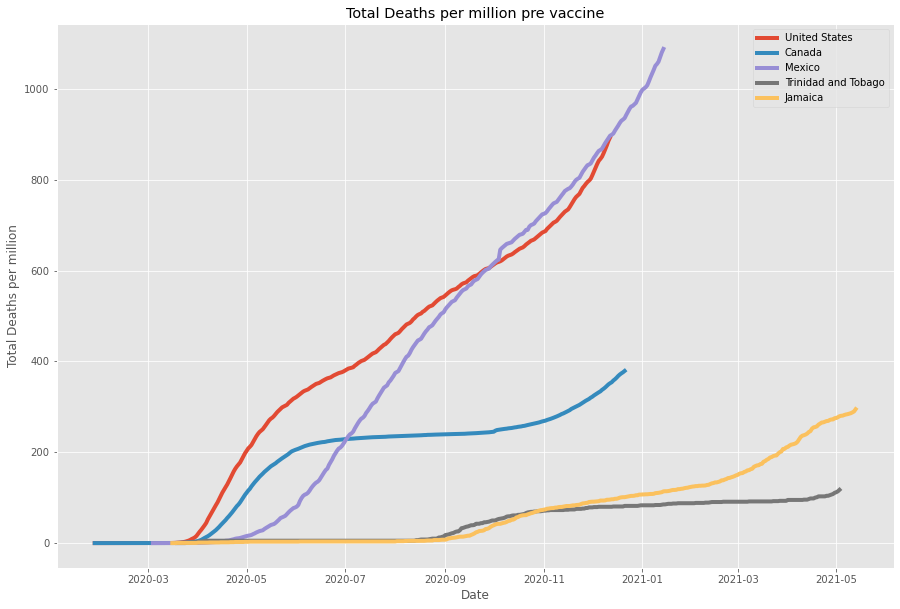

In [93]:
plt.style.use('ggplot')
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']
fig, ax = plt.subplots(figsize=(15,10))
for i in Countries:
    ax.plot(pre_vac[pre_vac['location']==i]['date'], pre_vac[pre_vac['location']==i]['total_deaths_per_million'], label=i, linewidth=4.0) 
ax.set(title='Total Deaths per million pre vaccine', xlabel='Date', ylabel='Total Deaths per million')
ax.legend()
plt.show()

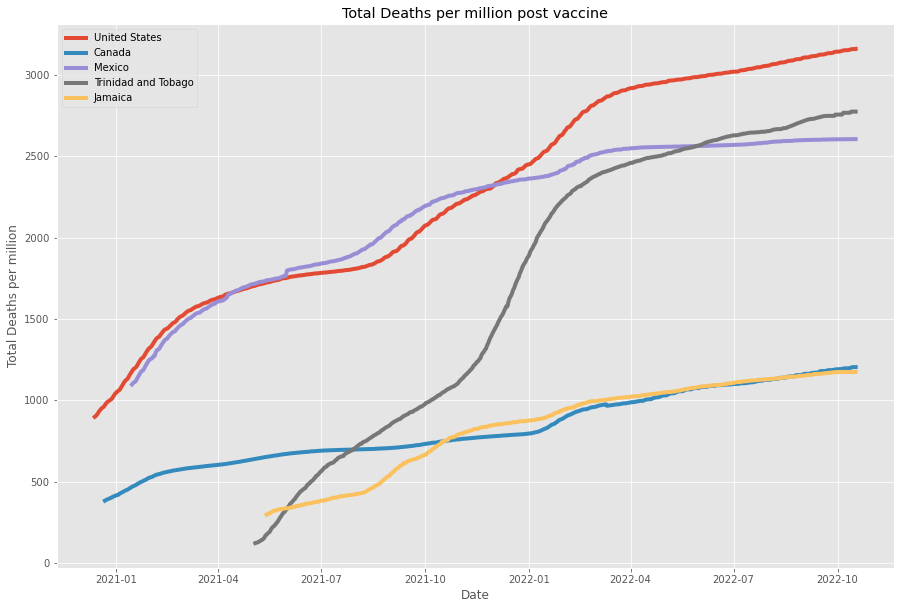

In [94]:
plt.style.use('ggplot')
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']
fig, ax = plt.subplots(figsize=(15,10))
for i in Countries:
    ax.plot(post_vac[post_vac['location']==i]['date'], post_vac[post_vac['location']==i]['total_deaths_per_million'], label=i, linewidth=4.0) 
ax.set(title='Total Deaths per million post vaccine', xlabel='Date', ylabel='Total Deaths per million')
ax.legend()
plt.show()

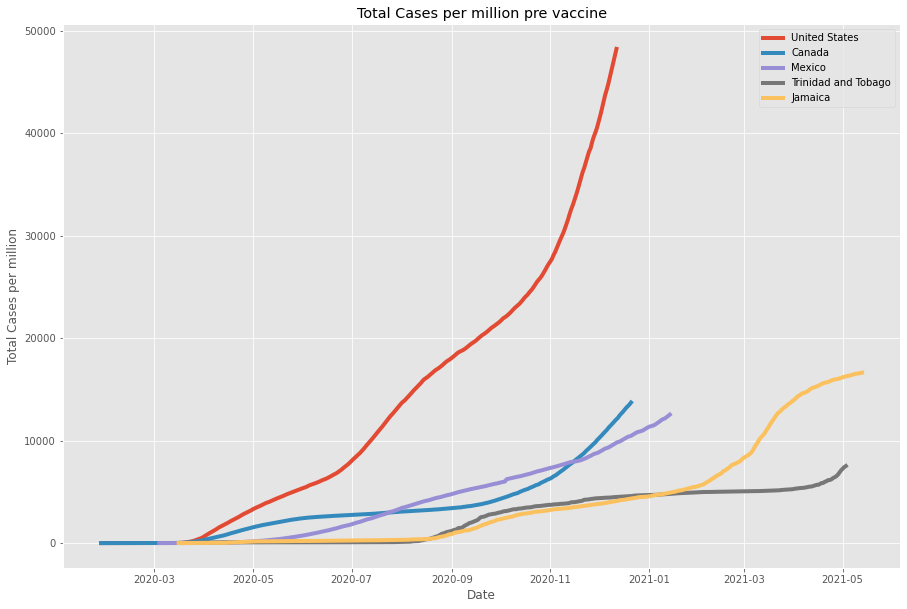

In [95]:
plt.style.use('ggplot')
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']
fig, ax = plt.subplots(figsize=(15,10))
for i in Countries:
    ax.plot(pre_vac[pre_vac['location']==i]['date'], pre_vac[pre_vac['location']==i]['total_cases_per_million'], label=i, linewidth=4.0) 
ax.set(title='Total Cases per million pre vaccine', xlabel='Date', ylabel='Total Cases per million')
ax.legend()
plt.show()

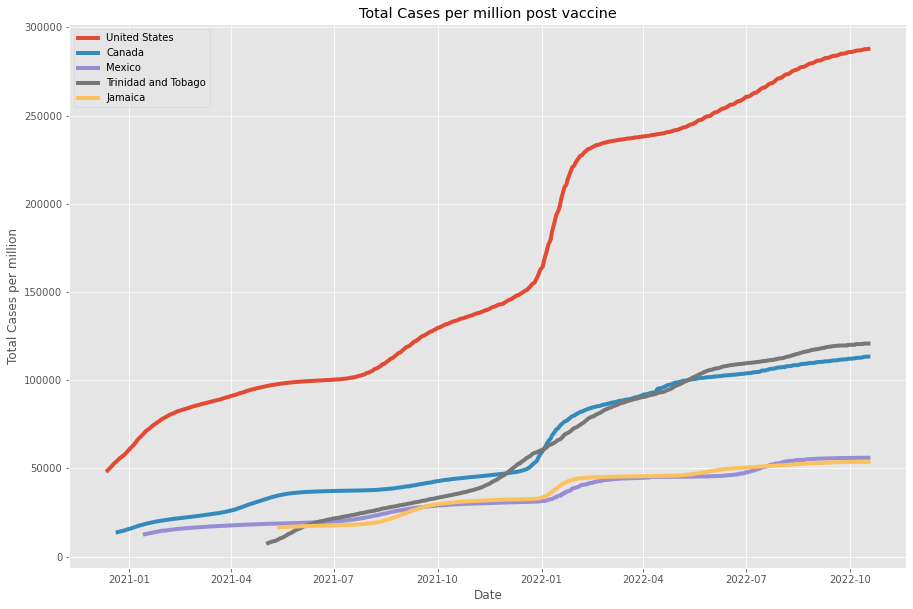

In [96]:
plt.style.use('ggplot')
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']
fig, ax = plt.subplots(figsize=(15,10))
for i in Countries:
    ax.plot(post_vac[post_vac['location']==i]['date'], post_vac[post_vac['location']==i]['total_cases_per_million'], label=i, linewidth=4.0) 
ax.set(title='Total Cases per million post vaccine', xlabel='Date', ylabel='Total Cases per million')
ax.legend()
plt.show()

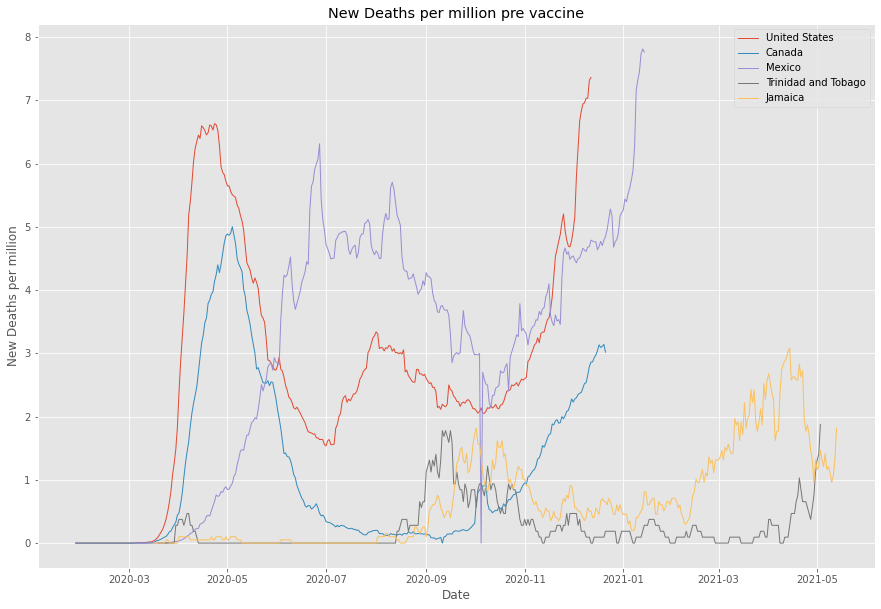

In [97]:
plt.style.use('ggplot')
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']
fig, ax = plt.subplots(figsize=(15,10))
for i in Countries:
    ax.plot(pre_vac[pre_vac['location']==i]['date'], pre_vac[pre_vac['location']==i]['new_deaths_smoothed_per_million'], label=i, linewidth=1.0) 
ax.set(title='New Deaths per million pre vaccine', xlabel='Date', ylabel='New Deaths per million')
ax.legend()
plt.show()

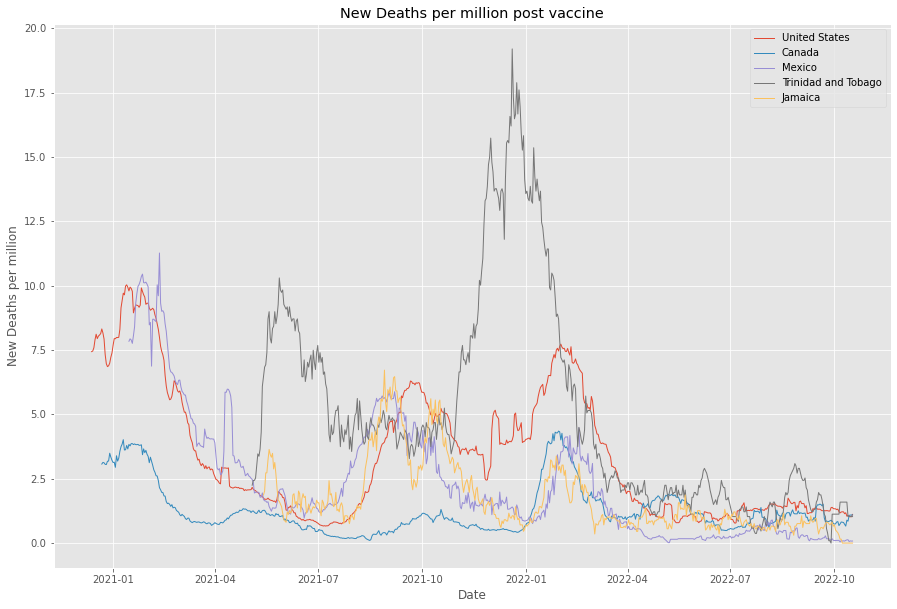

In [98]:
plt.style.use('ggplot')
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']
fig, ax = plt.subplots(figsize=(15,10))
for i in Countries:
    ax.plot(post_vac[post_vac['location']==i]['date'], post_vac[post_vac['location']==i]['new_deaths_smoothed_per_million'], label=i, linewidth=1.0) 
ax.set(title='New Deaths per million post vaccine', xlabel='Date', ylabel='New Deaths per million')
ax.legend()
plt.show()

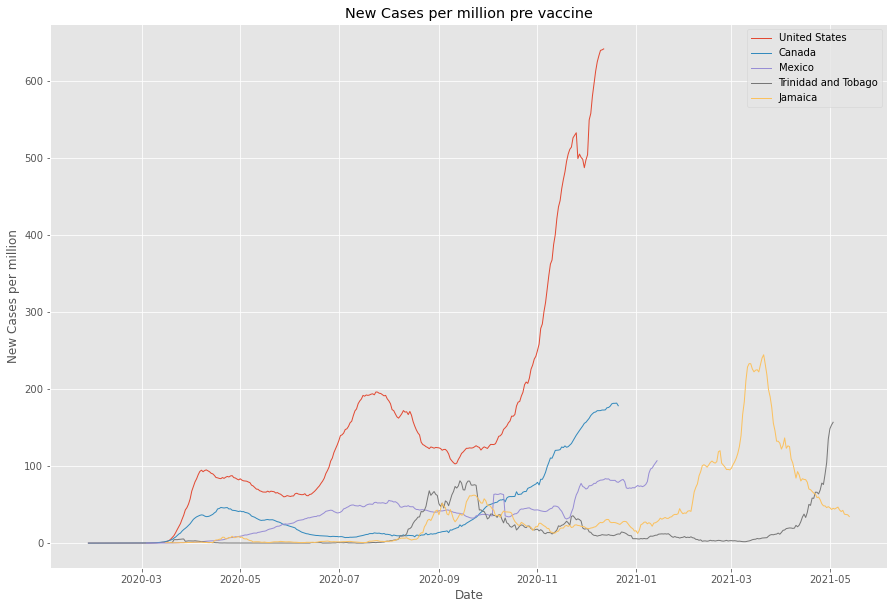

In [99]:
plt.style.use('ggplot')
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']
fig, ax = plt.subplots(figsize=(15,10))
for i in Countries:
    ax.plot(pre_vac[pre_vac['location']==i]['date'], pre_vac[pre_vac['location']==i]['new_cases_smoothed_per_million'], label=i, linewidth=1.0) 
ax.set(title='New Cases per million pre vaccine', xlabel='Date', ylabel='New Cases per million')
ax.legend()
plt.show()

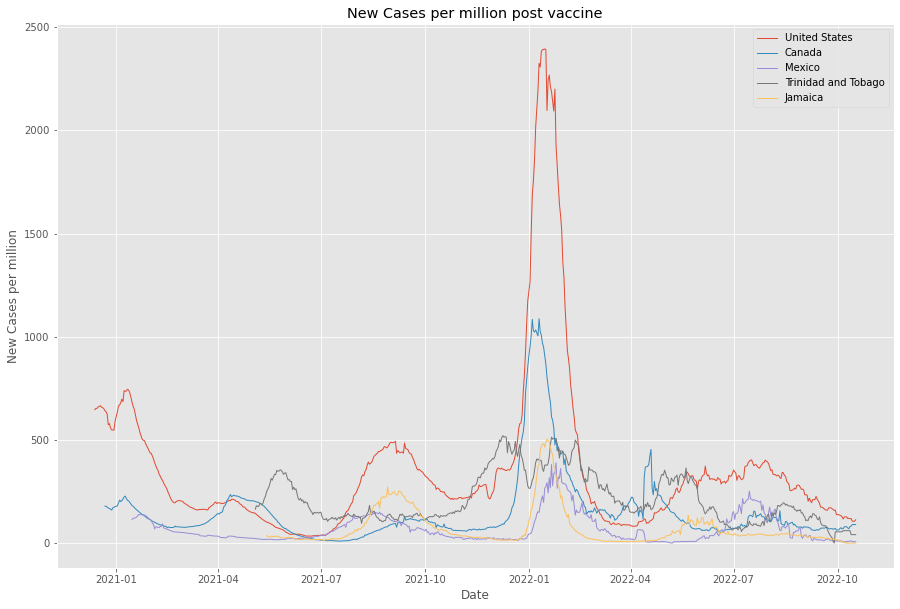

In [100]:
plt.style.use('ggplot')
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']
fig, ax = plt.subplots(figsize=(15,10))
for i in Countries:
    ax.plot(post_vac[post_vac['location']==i]['date'], post_vac[post_vac['location']==i]['new_cases_smoothed_per_million'], label=i, linewidth=1.0) 
ax.set(title='New Cases per million post vaccine', xlabel='Date', ylabel='New Cases per million')
ax.legend()
plt.show()

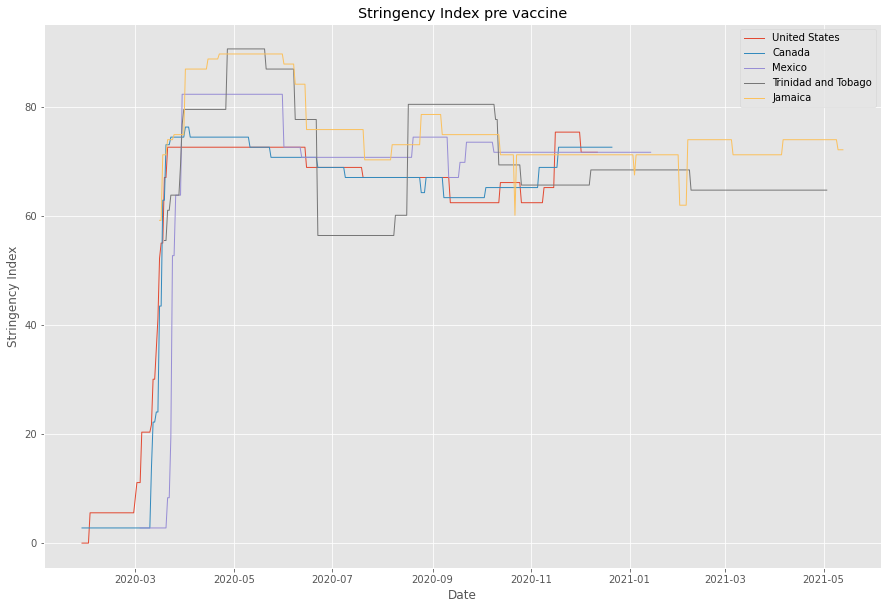

In [101]:
plt.style.use('ggplot')
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']
fig, ax = plt.subplots(figsize=(15,10))
for i in Countries:
    ax.plot(pre_vac[pre_vac['location']==i]['date'], pre_vac[pre_vac['location']==i]['stringency_index'], label=i, linewidth=1.0) 
ax.set(title='Stringency Index pre vaccine', xlabel='Date', ylabel='Stringency Index')
ax.legend()
plt.show()

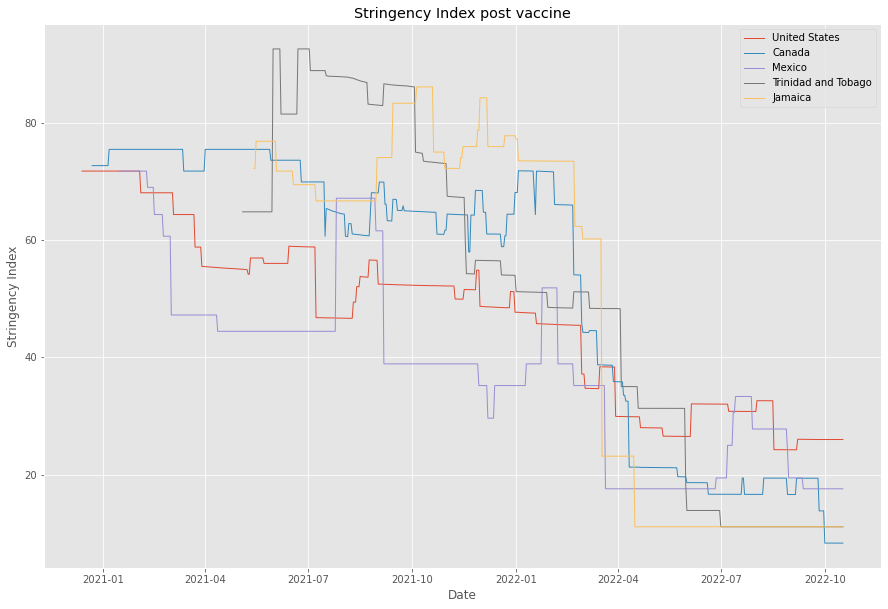

In [102]:
plt.style.use('ggplot')
Countries = ['United States', 'Canada', 'Mexico', 'Trinidad and Tobago', 'Jamaica']
fig, ax = plt.subplots(figsize=(15,10))
for i in Countries:
    ax.plot(post_vac[post_vac['location']==i]['date'], post_vac[post_vac['location']==i]['stringency_index'], label=i, linewidth=1.0) 
ax.set(title='Stringency Index post vaccine', xlabel='Date', ylabel='Stringency Index')
ax.legend()
plt.show()

**We will now create the samples of both dataframes that will be used in the method**

In [103]:
pre_vac = pre_vac.reset_index()

In [104]:
pre_vac1 = pre_vac.sample(frac=0.5, random_state=42)
pre_vac2 = pre_vac.drop(pre_vac1.index)  

In [105]:
pre_vac1.shape

(900, 20)

In [106]:
pre_vac2.shape

(901, 20)

In [107]:
# Write DataFrame to Excel file
#pre_vac2.to_excel('pre_vac2_new.xlsx')

In [108]:
post_vac = post_vac.reset_index()

In [109]:
post_vac1 = post_vac.sample(frac=0.5, random_state=42)
post_vac2 = post_vac.drop(post_vac1.index)

In [110]:
post_vac1.shape

(1517, 22)

In [111]:
post_vac2.shape

(1517, 22)

In [112]:
# Write DataFrame to Excel file
#post_vac2.to_excel('post_vac2_new.xlsx')

## Part 1

In [113]:
pre_vac1.head()

,iso_code,date,location,total_deaths_per_million,total_cases_per_million,stringency_index,new_deaths_smoothed,new_cases_smoothed,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,aged_65_older,median_age,hospital_beds_per_thousand,gdp_per_capita,population,cardiovasc_death_rate,total_deaths,total_cases,diabetes_prevalence,population_density
973,TTO,2020-03-26,Trinidad and Tobago,0.655,42.604,63.89,0.000,8.000,5.244,0.000,10.014,36.2,3.00,28763.071,1525663.0,228.467,1.0,65.0,10.97,266.886
1747,JAM,2021-03-21,Jamaica,188.493,12497.109,71.30,6.857,691.286,244.470,2.425,9.684,31.4,1.70,8193.571,2827694.0,206.537,533.0,35338.0,11.28,266.879
785,MEX,2020-07-18,Mexico,306.917,2674.817,70.83,594.000,6235.000,49.209,4.688,6.857,29.3,1.38,17336.469,126705138.0,152.783,38888.0,338913.0,13.06,66.444
162,USA,2020-07-08,United States,393.297,9099.987,68.98,631.857,52631.857,156.179,1.875,15.413,38.3,2.77,54225.446,336997624.0,151.089,132540.0,3066674.0,10.79,35.608
1272,TTO,2021-01-19,Trinidad and Tobago,86.520,4860.182,68.52,0.571,18.429,12.079,0.375,10.014,36.2,3.00,28763.071,1525663.0,228.467,132.0,7415.0,10.97,266.886


In [114]:
post_vac1.head()

,iso_code,date,location,total_deaths_per_million,total_cases_per_million,stringency_index,new_deaths_smoothed,new_cases_smoothed,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,aged_65_older,median_age,hospital_beds_per_thousand,gdp_per_capita,people_fully_vaccinated,population,cardiovasc_death_rate,total_deaths,total_cases,diabetes_prevalence,population_density,proportion_vaccinated
2880,JAM,2022-05-17,Jamaica,1064.825,47071.218,11.11,4.429,253.714,89.725,1.566,9.684,31.4,1.70,8193.571,6.935380e+05,2827694.0,206.537,3011.0,133103.0,11.28,266.879,0.245266
2179,TTO,2021-11-19,Trinidad and Tobago,1257.814,42534.295,54.26,13.000,482.000,315.928,8.521,10.014,36.2,3.00,28763.071,6.333410e+05,1525663.0,228.467,1919.0,64893.0,10.97,266.886,0.415125
2370,TTO,2022-05-29,Trinidad and Tobago,2564.131,105664.226,31.30,2.714,426.143,279.317,1.779,10.014,36.2,3.00,28763.071,7.125143e+05,1525663.0,228.467,3912.0,161208.0,10.97,266.886,0.467019
432,USA,2022-02-18,United States,2774.340,233223.499,45.50,2261.571,106910.857,317.245,6.711,15.413,38.3,2.77,54225.446,2.169611e+08,336997624.0,151.089,934946.0,78595765.0,10.79,35.608,0.643806
794,CAN,2021-04-21,Canada,622.828,30369.378,75.46,45.429,8395.143,220.027,1.191,16.984,41.4,2.50,44017.591,9.855580e+05,38155012.0,105.599,23764.0,1158744.0,7.37,4.037,0.025830


### A. pre_vac1

Scale and Split data

- firstly pre_vac1

In [115]:
pre_vac1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 973 to 925
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         900 non-null    object        
 1   date                             900 non-null    datetime64[ns]
 2   location                         900 non-null    object        
 3   total_deaths_per_million         900 non-null    float64       
 4   total_cases_per_million          900 non-null    float64       
 5   stringency_index                 900 non-null    float64       
 6   new_deaths_smoothed              900 non-null    float64       
 7   new_cases_smoothed               900 non-null    float64       
 8   new_cases_smoothed_per_million   900 non-null    float64       
 9   new_deaths_smoothed_per_million  900 non-null    float64       
 10  aged_65_older                    900 non-null    float64    

In [116]:
pre_vac1['location'].value_counts()

Jamaica                218
Trinidad and Tobago    190
Canada                 183
United States          159
Mexico                 150
Name: location, dtype: int64

In [117]:
pre_vac1 = pre_vac1.drop(['iso_code', 'date', 'location'], axis=1)

In [118]:

#x_train,x_test,y_train,y_test = train_test_split(pre_vac1,y,test_size=0.2)

scaled_features = StandardScaler().fit_transform(pre_vac1.values)

scaled = pd.DataFrame(scaled_features, index=pre_vac1.index, columns=pre_vac1.columns)

y = scaled['total_deaths_per_million']
scaled.drop('total_deaths_per_million', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size = 0.2, random_state = 42)

In [119]:
X_train.head()

,total_cases_per_million,stringency_index,new_deaths_smoothed,new_cases_smoothed,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,aged_65_older,median_age,hospital_beds_per_thousand,gdp_per_capita,population,cardiovasc_death_rate,total_deaths,total_cases,diabetes_prevalence,population_density
1663,-0.148462,0.214092,-0.547478,-0.359257,-0.348471,-0.601069,-0.568070,-0.898056,-0.931516,-1.259375,-0.706028,0.775292,-0.526089,-0.375851,0.359310,1.083842
1309,-0.077658,-0.165653,-0.549971,-0.361425,-0.590730,-0.804572,-0.478587,0.202821,1.182568,-0.042207,-0.716644,1.265986,-0.528427,-0.377773,0.188047,1.083902
254,2.202395,-0.300816,0.982564,1.153036,0.882698,0.318356,0.985410,0.684455,0.808538,1.464489,2.018650,-0.465383,2.643436,2.532897,0.088603,-0.878946
712,-0.704068,0.864162,-0.247452,-0.316000,-0.501828,-0.239726,-1.334642,-1.379690,-1.451906,-0.718359,0.304015,-0.427479,-0.489981,-0.370151,1.342697,-0.617242
1654,-0.179853,0.214092,-0.546233,-0.359113,-0.331464,-0.487198,-0.568070,-0.898056,-0.931516,-1.259375,-0.706028,0.775292,-0.526269,-0.376113,0.359310,1.083842


In [120]:
X_train = sm.add_constant(X_train)

In [121]:
lr_1 = sm.OLS(endog = y_train, exog = X_train[['const', 'stringency_index', 'hospital_beds_per_thousand', 'gdp_per_capita', 'diabetes_prevalence', 'aged_65_older']]).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     total_deaths_per_million   R-squared:                       0.454
Model:                                  OLS   Adj. R-squared:                  0.451
Method:                       Least Squares   F-statistic:                     118.9
Date:                      Thu, 21 Sep 2023   Prob (F-statistic):           1.87e-91
Time:                              14:56:25   Log-Likelihood:                -801.00
No. Observations:                       720   AIC:                             1614.
Df Residuals:                           714   BIC:                             1641.
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0095      0.028      0.343      0.732      -0.045       0.064
stringency_index               0.2050      0.030      6.774      0.000       0.146       0.264
hospital_beds_per_thousand    -0.7156      0.044    -16.311      0.000      -0.802      -0.629
gdp_per_capita                 1.2264      0.085     14.417      0.000       1.059       1.393
diabetes_prevalence            0.1842      0.078      2.359      0.019       0.031       0.337
aged_65_older                 -0.3637      0.118     -3.090      0.002      -0.595      -0.133
==============================================================================
Omnibus:                       26.782   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.282
Skew:                           0.019   Prob(JB):                     9.03e-16
Kurtosis:                       4.519   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**regression ran stepwise until optimal solution was found (done in every part)**

In [122]:
model = ConstrainedLinearRegression()
min_coef = np.repeat(-1, 5)
max_coef = np.repeat(1, 5)
model.fit(X=X_train[['stringency_index', 'hospital_beds_per_thousand', 'gdp_per_capita', 'diabetes_prevalence', 'aged_65_older']], y=y_train, max_coef=max_coef, min_coef=min_coef)
print(model.intercept_)
print(model.coef_)

0.010173149145396741
[ 0.19035384 -0.63982949  1.          0.32847035 -0.09586068]


In [123]:
X_test = sm.add_constant(X_test)
X_test = X_test[['const', 'stringency_index', 'hospital_beds_per_thousand', 'gdp_per_capita', 'diabetes_prevalence', 'aged_65_older']]
y_pred = lr_1.predict(X_test)
r2_score(y_true = y_test, y_pred = y_pred)

0.4726027174520845

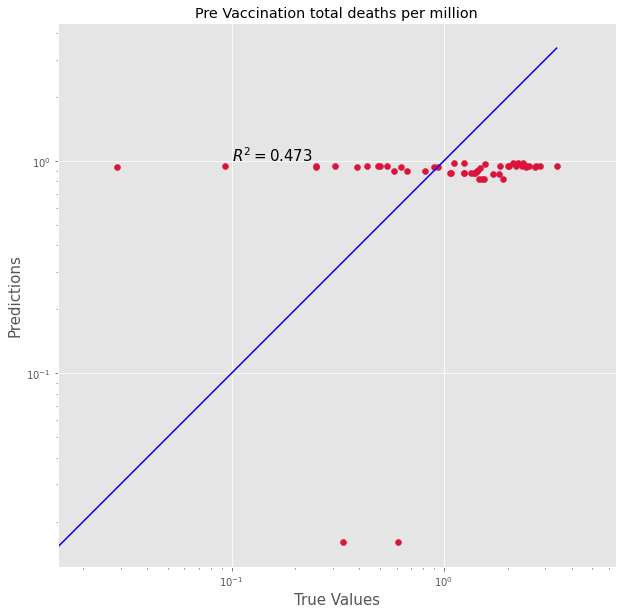

In [124]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

plt.title('Pre Vaccination total deaths per million')
plt.text(0.1, 1, r'$R^2 = 0.473$', fontsize=15)

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

### B. 

total cases per million

In [125]:
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#sc.fit(pre_vac1)
#pre_vac1 = sc.transform(pre_vac1)
from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(pre_vac1,y,test_size=0.2)

scaled_features = StandardScaler().fit_transform(pre_vac1.values)

scaled = pd.DataFrame(scaled_features, index=pre_vac1.index, columns=pre_vac1.columns)

y = scaled['total_cases_per_million']
scaled.drop('total_cases_per_million', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size = 0.2, random_state = 42)

In [126]:
X_train = sm.add_constant(X_train)

In [127]:
lr_1 = sm.OLS(endog = y_train, exog = X_train[['const', 'stringency_index', 'hospital_beds_per_thousand', 'gdp_per_capita', 'diabetes_prevalence', 'median_age']]).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     total_cases_per_million   R-squared:                       0.326
Model:                                 OLS   Adj. R-squared:                  0.321
Method:                      Least Squares   F-statistic:                     69.12
Date:                     Thu, 21 Sep 2023   Prob (F-statistic):           5.94e-59
Time:                             14:56:26   Log-Likelihood:                -874.03
No. Observations:                      720   AIC:                             1760.
Df Residuals:                          714   BIC:                             1788.
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0161      0.031      0.527      0.599      -0.044       0.076
stringency_index               0.1467      0.033      4.379      0.000       0.081       0.212
hospital_beds_per_thousand    28.0936      2.743     10.243      0.000      22.709      33.478
gdp_per_capita                37.7995      3.597     10.508      0.000      30.737      44.862
diabetes_prevalence          -57.2835      5.584    -10.258      0.000     -68.247     -46.320
median_age                  -104.8568     10.163    -10.318      0.000    -124.810     -84.904
==============================================================================
Omnibus:                      188.781   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              762.381
Skew:                           1.163   Prob(JB):                    2.83e-166
Kurtosis:                       7.472   Cond. No.                         741.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
model = ConstrainedLinearRegression()
min_coef = np.repeat(-1, 5)
max_coef = np.repeat(1, 5)
model.fit(X=X_train[['stringency_index', 'hospital_beds_per_thousand', 'gdp_per_capita', 'diabetes_prevalence', 'median_age']], y=y_train, max_coef=max_coef, min_coef=min_coef)
print(model.intercept_)
print(model.coef_)

0.009023899401106025
[ 0.17284374  0.0458558   1.         -0.16540262 -0.8966198 ]


In [129]:
X_test = sm.add_constant(X_test)
X_test = X_test[['const', 'stringency_index', 'hospital_beds_per_thousand', 'gdp_per_capita', 'diabetes_prevalence', 'median_age']]
y_pred = lr_1.predict(X_test)
r2_score(y_true = y_test, y_pred = y_pred)

0.3190460034518873

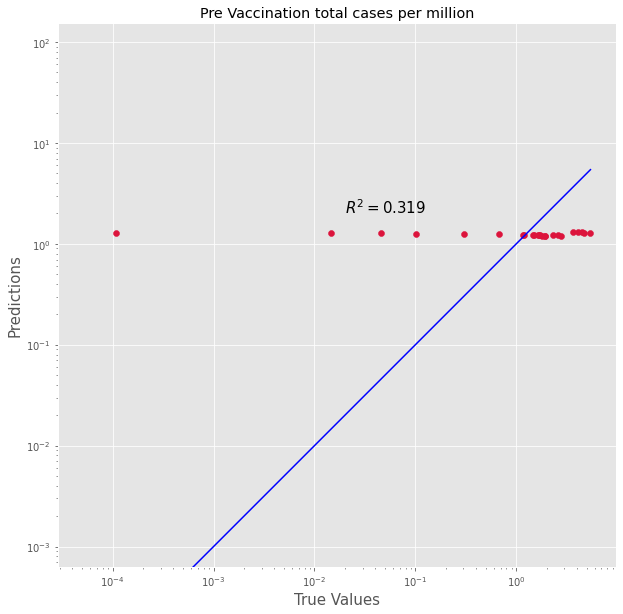

In [130]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

plt.title('Pre Vaccination total cases per million')
plt.text(0.02, 2, r'$R^2 = 0.319$', fontsize=15)

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

### C.

total deaths change it to new_deaths per million

In [131]:
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#sc.fit(pre_vac1)
#pre_vac1 = sc.transform(pre_vac1)
from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(pre_vac1,y,test_size=0.2)

scaled_features = StandardScaler().fit_transform(pre_vac1.values)

scaled = pd.DataFrame(scaled_features, index=pre_vac1.index, columns=pre_vac1.columns)

y = scaled['new_deaths_smoothed_per_million']
scaled.drop('new_deaths_smoothed_per_million', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size = 0.2, random_state = 42)

In [132]:
X_train = sm.add_constant(X_train)

In [133]:
lr_1 = sm.OLS(endog = y_train, exog = X_train[['const', 'stringency_index', 'hospital_beds_per_thousand', 'gdp_per_capita', 'diabetes_prevalence', 'aged_65_older']]).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     new_deaths_smoothed_per_million   R-squared:                       0.529
Model:                                         OLS   Adj. R-squared:                  0.526
Method:                              Least Squares   F-statistic:                     160.4
Date:                             Thu, 21 Sep 2023   Prob (F-statistic):          3.46e-114
Time:                                     14:56:27   Log-Likelihood:                -739.42
No. Observations:                              720   AIC:                             1491.
Df Residuals:                                  714   BIC:                             1518.
Df Model:                                        5                                         
Covariance Type:                         nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0080      0.025      0.318      0.751      -0.042       0.058
stringency_index               0.2836      0.028     10.207      0.000       0.229       0.338
hospital_beds_per_thousand    -0.7944      0.040    -19.725      0.000      -0.873      -0.715
gdp_per_capita                 1.2464      0.078     15.960      0.000       1.093       1.400
diabetes_prevalence            0.1759      0.072      2.454      0.014       0.035       0.317
aged_65_older                 -0.3798      0.108     -3.516      0.000      -0.592      -0.168
==============================================================================
Omnibus:                       50.002   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.744
Skew:                           0.425   Prob(JB):                     2.97e-23
Kurtosis:                       4.654   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
model = ConstrainedLinearRegression()
min_coef = np.repeat(-1, 5)
max_coef = np.repeat(1, 5)
model.fit(X=X_train[['stringency_index', 'hospital_beds_per_thousand', 'gdp_per_capita', 'diabetes_prevalence', 'aged_65_older']], y=y_train, max_coef=max_coef, min_coef=min_coef)
print(model.intercept_)
print(model.coef_)

0.008821028166381074
[ 0.26764096 -0.71198363  1.          0.33292507 -0.08838611]


In [135]:
X_test = sm.add_constant(X_test)
X_test = X_test[['const', 'stringency_index', 'hospital_beds_per_thousand', 'gdp_per_capita', 'diabetes_prevalence', 'aged_65_older']]
y_pred = lr_1.predict(X_test)
r2_score(y_true = y_test, y_pred = y_pred)

0.5440769815925321

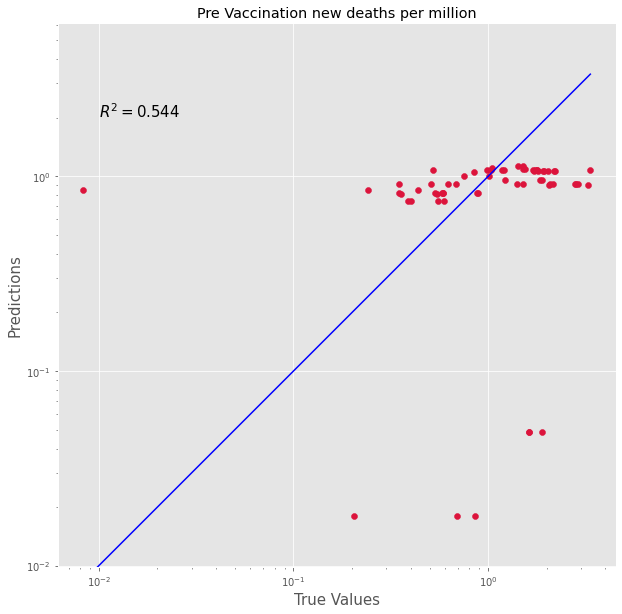

In [136]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

plt.title('Pre Vaccination new deaths per million')
plt.text(0.01, 2, r'$R^2 = 0.544$', fontsize=15)

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

## D.

new cases per million

In [137]:
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#sc.fit(pre_vac1)
#pre_vac1 = sc.transform(pre_vac1)
from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(pre_vac1,y,test_size=0.2)

scaled_features = StandardScaler().fit_transform(pre_vac1.values)

scaled = pd.DataFrame(scaled_features, index=pre_vac1.index, columns=pre_vac1.columns)

y = scaled['new_cases_smoothed_per_million']
scaled.drop('new_cases_smoothed_per_million', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size = 0.2, random_state = 42)

In [138]:
X_train = sm.add_constant(X_train)

In [139]:
lr_1 = sm.OLS(endog = y_train, exog = X_train[['const', 'stringency_index', 'hospital_beds_per_thousand', 'gdp_per_capita', 'diabetes_prevalence', 'median_age']]).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     new_cases_smoothed_per_million   R-squared:                       0.370
Model:                                        OLS   Adj. R-squared:                  0.365
Method:                             Least Squares   F-statistic:                     83.74
Date:                            Thu, 21 Sep 2023   Prob (F-statistic):           3.24e-69
Time:                                    14:56:27   Log-Likelihood:                -850.08
No. Observations:                             720   AIC:                             1712.
Df Residuals:                                 714   BIC:                             1740.
Df Model:                                       5                                         
Covariance Type:                        nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0109      0.030      0.369      0.712      -0.047       0.069
stringency_index               0.1941      0.032      5.991      0.000       0.130       0.258
hospital_beds_per_thousand    28.6204      2.653     10.788      0.000      23.412      33.829
gdp_per_capita                38.6604      3.479     11.111      0.000      31.829      45.492
diabetes_prevalence          -58.5445      5.401    -10.839      0.000     -69.149     -47.940
median_age                  -107.0614      9.830    -10.891      0.000    -126.362     -87.761
==============================================================================
Omnibus:                      439.492   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4786.321
Skew:                           2.593   Prob(JB):                         0.00
Kurtosis:                      14.517   Cond. No.                         741.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
model = ConstrainedLinearRegression()
min_coef = np.repeat(-1, 5)
max_coef = np.repeat(1, 5)
model.fit(X=X_train[['stringency_index', 'hospital_beds_per_thousand', 'gdp_per_capita', 'diabetes_prevalence', 'median_age']], y=y_train, max_coef=max_coef, min_coef=min_coef)
print(model.intercept_)
print(model.coef_)

0.00367289760852228
[ 0.22088989 -0.08353626  1.         -0.09012796 -0.66913707]


In [141]:
X_test = sm.add_constant(X_test)
X_test = X_test[['const', 'stringency_index', 'hospital_beds_per_thousand', 'gdp_per_capita', 'diabetes_prevalence', 'median_age']]
y_pred = lr_1.predict(X_test)
r2_score(y_true = y_test, y_pred = y_pred)

0.3058055738062546

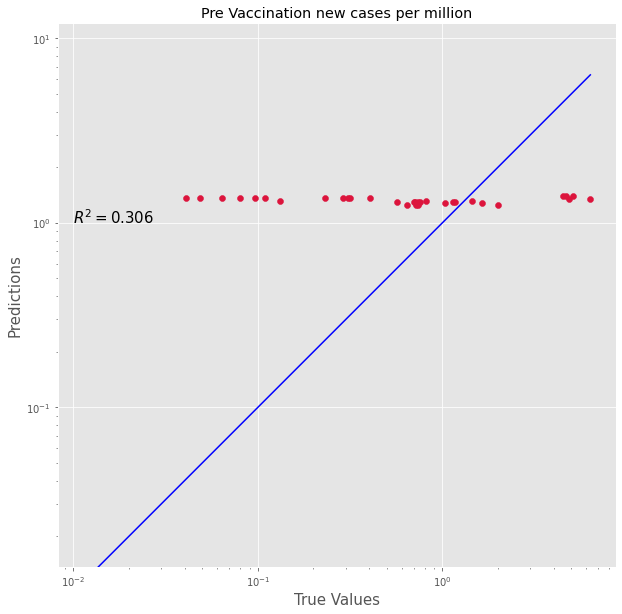

In [142]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

plt.title('Pre Vaccination new cases per million')
plt.text(0.01, 1, r'$R^2 = 0.306$', fontsize=15)

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

## A. post_vac

total deaths per million

In [143]:
post_vac1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 2880 to 2024
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         1517 non-null   object        
 1   date                             1517 non-null   datetime64[ns]
 2   location                         1517 non-null   object        
 3   total_deaths_per_million         1517 non-null   float64       
 4   total_cases_per_million          1517 non-null   float64       
 5   stringency_index                 1517 non-null   float64       
 6   new_deaths_smoothed              1517 non-null   float64       
 7   new_cases_smoothed               1517 non-null   float64       
 8   new_cases_smoothed_per_million   1517 non-null   float64       
 9   new_deaths_smoothed_per_million  1517 non-null   float64       
 10  aged_65_older                    1517 non-null   float64 

In [144]:
post_vac1['location'].value_counts()

United States          349
Canada                 325
Mexico                 312
Jamaica                269
Trinidad and Tobago    262
Name: location, dtype: int64

In [145]:
post_vac1 = post_vac1.drop(['iso_code', 'date', 'location'], axis=1)

In [146]:
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#sc.fit(post_vac1)
#post_vac1 = sc.transform(post_vac1)
from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(post_vac1,y,test_size=0.2)

scaled_features = StandardScaler().fit_transform(post_vac1.values)

scaled = pd.DataFrame(scaled_features, index=post_vac1.index, columns=post_vac1.columns)

y = scaled['total_deaths_per_million']
scaled.drop('total_deaths_per_million', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size = 0.2, random_state = 42)

In [147]:
X_train = sm.add_constant(X_train)

In [148]:
lr_1 = sm.OLS(endog = y_train, exog = X_train[['const', 'stringency_index', 'hospital_beds_per_thousand', 'diabetes_prevalence', 'proportion_vaccinated', 'aged_65_older', 'median_age']]).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     total_deaths_per_million   R-squared:                       0.852
Model:                                  OLS   Adj. R-squared:                  0.851
Method:                       Least Squares   F-statistic:                     1153.
Date:                      Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                              14:56:28   Log-Likelihood:                -554.23
No. Observations:                      1213   AIC:                             1122.
Df Residuals:                          1206   BIC:                             1158.
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0074      0.011     -0.671      0.502      -0.029       0.014
stringency_index              -0.3390      0.014    -23.917      0.000      -0.367      -0.311
hospital_beds_per_thousand    -0.4191      0.042    -10.085      0.000      -0.501      -0.338
diabetes_prevalence            1.7331      0.043     40.502      0.000       1.649       1.817
proportion_vaccinated          0.2844      0.016     17.494      0.000       0.252       0.316
aged_65_older                 -0.3976      0.050     -7.943      0.000      -0.496      -0.299
median_age                     2.0100      0.109     18.367      0.000       1.795       2.225
==============================================================================
Omnibus:                       12.815   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               10.830
Skew:                          -0.162   Prob(JB):                      0.00445
Kurtosis:                       2.670   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
model = ConstrainedLinearRegression()
min_coef = np.repeat(-1, 6)
max_coef = np.repeat(1, 6)
model.fit(X=X_train[['stringency_index', 'hospital_beds_per_thousand', 'diabetes_prevalence', 'proportion_vaccinated', 'aged_65_older', 'median_age']], y=y_train, max_coef=max_coef, min_coef=min_coef)
print(model.intercept_)
print(model.coef_)

-0.007635034775771552
[-0.31057067  0.16813347  1.          0.37520292  0.07846793  0.39296508]


In [150]:
X_test = sm.add_constant(X_test)
X_test = X_test[['const', 'stringency_index', 'hospital_beds_per_thousand', 'diabetes_prevalence', 'proportion_vaccinated', 'aged_65_older', 'median_age']]
y_pred = lr_1.predict(X_test)
r2_score(y_true = y_test, y_pred = y_pred)

0.8618264143647549

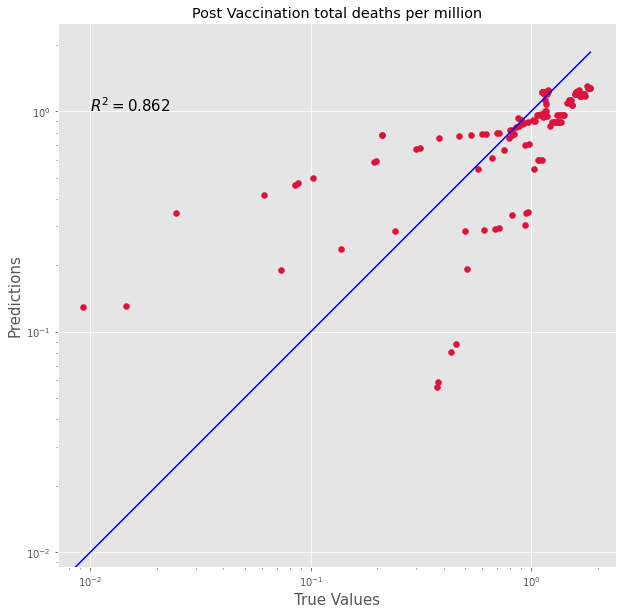

In [151]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

plt.title('Post Vaccination total deaths per million')
plt.text(0.01, 1, r'$R^2 = 0.862$', fontsize=15)

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

### B.

total cases per million

In [152]:
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#sc.fit(post_vac1)
#post_vac1 = sc.transform(post_vac1)
from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(post_vac1,y,test_size=0.2)

scaled_features = StandardScaler().fit_transform(post_vac1.values)

scaled = pd.DataFrame(scaled_features, index=post_vac1.index, columns=post_vac1.columns)

y = scaled['total_cases_per_million']
scaled.drop('total_cases_per_million', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size = 0.2, random_state = 42)

In [153]:
X_train = sm.add_constant(X_train)

In [154]:
lr_1 = sm.OLS(endog = y_train, exog = X_train[['const', 'stringency_index', 'hospital_beds_per_thousand', 'gdp_per_capita', 'diabetes_prevalence', 'proportion_vaccinated', 'aged_65_older']]).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     total_cases_per_million   R-squared:                       0.801
Model:                                 OLS   Adj. R-squared:                  0.800
Method:                      Least Squares   F-statistic:                     808.9
Date:                     Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                             14:56:29   Log-Likelihood:                -715.09
No. Observations:                     1213   AIC:                             1444.
Df Residuals:                         1206   BIC:                             1480.
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0079      0.013     -0.630      0.529      -0.033       0.017
stringency_index              -0.2774      0.016    -17.137      0.000      -0.309      -0.246
hospital_beds_per_thousand     0.4019      0.020     19.849      0.000       0.362       0.442
gdp_per_capita                -0.4046      0.044     -9.144      0.000      -0.491      -0.318
diabetes_prevalence            1.2340      0.038     32.699      0.000       1.160       1.308
proportion_vaccinated          0.2695      0.019     14.518      0.000       0.233       0.306
aged_65_older                  1.5341      0.059     26.187      0.000       1.419       1.649
==============================================================================
Omnibus:                       89.972   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.573
Skew:                           0.597   Prob(JB):                     1.20e-28
Kurtosis:                       4.058   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
model = ConstrainedLinearRegression()
min_coef = np.repeat(-1, 6)
max_coef = np.repeat(1, 6)
model.fit(X=X_train[['stringency_index', 'hospital_beds_per_thousand', 'gdp_per_capita', 'diabetes_prevalence', 'proportion_vaccinated', 'aged_65_older']], y=y_train, max_coef=max_coef, min_coef=min_coef)
print(model.intercept_)
print(model.coef_)

-0.01016659074811831
[-0.29260952  0.33606039 -0.05145138  0.92214377  0.23143655  1.        ]


In [156]:
X_test = sm.add_constant(X_test)
X_test = X_test[['const', 'stringency_index', 'hospital_beds_per_thousand', 'gdp_per_capita', 'diabetes_prevalence', 'proportion_vaccinated', 'aged_65_older']]
y_pred = lr_1.predict(X_test)
r2_score(y_true = y_test, y_pred = y_pred)

0.8140373519744958

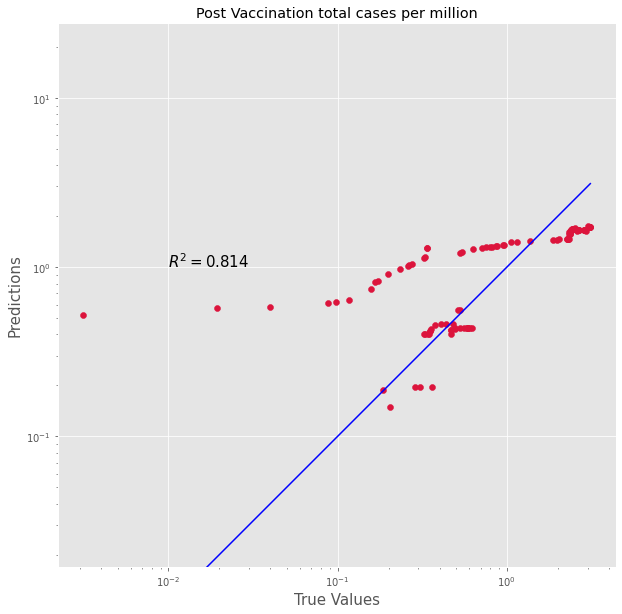

In [157]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

plt.title('Post Vaccination total cases per million')
plt.text(0.01, 1, r'$R^2 = 0.814$', fontsize=15)

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

### C.

total deaths we will change this to new deaths per million instead

In [158]:
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#sc.fit(post_vac1)
#post_vac1 = sc.transform(post_vac1)
from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(post_vac1,y,test_size=0.2)

scaled_features = StandardScaler().fit_transform(post_vac1.values)

scaled = pd.DataFrame(scaled_features, index=post_vac1.index, columns=post_vac1.columns)

y = scaled['new_deaths_smoothed_per_million']
scaled.drop('new_deaths_smoothed_per_million', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size = 0.2, random_state = 42)

In [159]:
X_train = sm.add_constant(X_train)

In [160]:
lr_1 = sm.OLS(endog = y_train, exog = X_train[['const', 'stringency_index', 'hospital_beds_per_thousand', 'gdp_per_capita', 'diabetes_prevalence', 'aged_65_older']]).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     new_deaths_smoothed_per_million   R-squared:                       0.385
Model:                                         OLS   Adj. R-squared:                  0.383
Method:                              Least Squares   F-statistic:                     151.3
Date:                             Thu, 21 Sep 2023   Prob (F-statistic):          8.04e-125
Time:                                     14:56:29   Log-Likelihood:                -1442.3
No. Observations:                             1213   AIC:                             2897.
Df Residuals:                                 1207   BIC:                             2927.
Df Model:                                        5                                         
Covariance Type:                         nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0051      0.023     -0.224      0.823      -0.050       0.040
stringency_index               0.4286      0.023     18.428      0.000       0.383       0.474
hospital_beds_per_thousand     0.4221      0.036     11.658      0.000       0.351       0.493
gdp_per_capita                 0.2975      0.074      4.002      0.000       0.152       0.443
diabetes_prevalence            0.1487      0.066      2.268      0.024       0.020       0.277
aged_65_older                 -0.5926      0.104     -5.702      0.000      -0.796      -0.389
==============================================================================
Omnibus:                      479.861   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2191.823
Skew:                           1.832   Prob(JB):                         0.00
Kurtosis:                       8.472   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
model = ConstrainedLinearRegression()
min_coef = np.repeat(-1, 5)
max_coef = np.repeat(1, 5)
model.fit(X=X_train[['stringency_index', 'hospital_beds_per_thousand', 'gdp_per_capita', 'diabetes_prevalence', 'aged_65_older']], y=y_train, max_coef=max_coef, min_coef=min_coef)
print(model.intercept_)
print(model.coef_)

-0.005124724732452027
[ 0.42860849  0.42214488  0.29751152  0.14869494 -0.59256924]


In [162]:
X_test = sm.add_constant(X_test)
X_test = X_test[['const', 'stringency_index', 'hospital_beds_per_thousand', 'gdp_per_capita', 'diabetes_prevalence', 'aged_65_older']]
y_pred = lr_1.predict(X_test)
r2_score(y_true = y_test, y_pred = y_pred)

0.42165465446150896

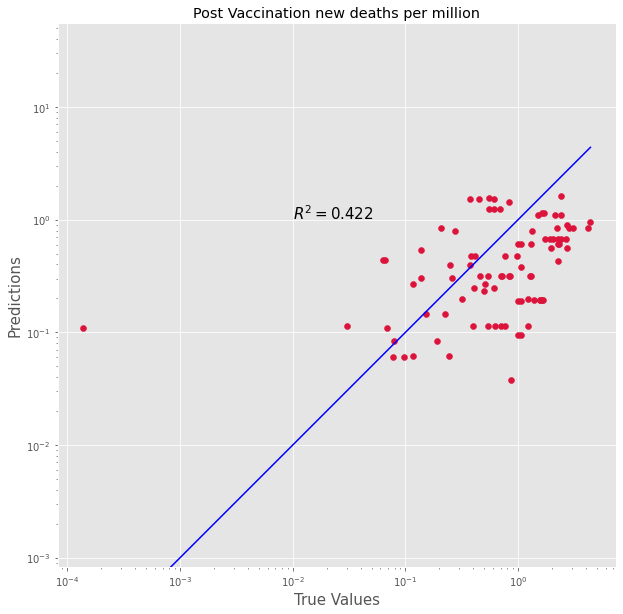

In [163]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

plt.title('Post Vaccination new deaths per million')
plt.text(0.01, 1, r'$R^2 = 0.422$', fontsize=15)

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

### D.

new cases per million

In [164]:
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#sc.fit(post_vac1)
#post_vac1 = sc.transform(post_vac1)
from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(post_vac1,y,test_size=0.2)

scaled_features = StandardScaler().fit_transform(post_vac1.values)

scaled = pd.DataFrame(scaled_features, index=post_vac1.index, columns=post_vac1.columns)

y = scaled['new_cases_smoothed_per_million']
scaled.drop('new_cases_smoothed_per_million', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size = 0.2, random_state = 42)

In [165]:
X_train = sm.add_constant(X_train)

In [166]:
lr_1 = sm.OLS(endog = y_train, exog = X_train[['const','stringency_index', 'hospital_beds_per_thousand', 'gdp_per_capita', 'diabetes_prevalence', 'proportion_vaccinated', 'median_age']]).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     new_cases_smoothed_per_million   R-squared:                       0.244
Model:                                        OLS   Adj. R-squared:                  0.241
Method:                             Least Squares   F-statistic:                     65.02
Date:                            Thu, 21 Sep 2023   Prob (F-statistic):           4.46e-70
Time:                                    14:56:30   Log-Likelihood:                -1490.7
No. Observations:                            1213   AIC:                             2995.
Df Residuals:                                1206   BIC:                             3031.
Df Model:                                       6                                         
Covariance Type:                        nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0160      0.024     -0.670      0.503      -0.063       0.031
stringency_index               0.2413      0.031      7.865      0.000       0.181       0.301
hospital_beds_per_thousand    12.1993      2.227      5.477      0.000       7.829      16.569
gdp_per_capita                15.9921      2.933      5.452      0.000      10.238      21.747
diabetes_prevalence          -25.1737      4.736     -5.316      0.000     -34.464     -15.883
proportion_vaccinated          0.2290      0.035      6.511      0.000       0.160       0.298
median_age                   -45.6030      8.490     -5.372      0.000     -62.259     -28.947
==============================================================================
Omnibus:                     1216.520   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71848.057
Skew:                           4.697   Prob(JB):                         0.00
Kurtosis:                      39.515   Cond. No.                         803.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
model = ConstrainedLinearRegression()
min_coef = np.repeat(-1, 6)
max_coef = np.repeat(1, 6)
model.fit(X=X_train[['stringency_index', 'hospital_beds_per_thousand', 'gdp_per_capita', 'diabetes_prevalence', 'proportion_vaccinated', 'median_age']], y=y_train, max_coef=max_coef, min_coef=min_coef)
print(model.intercept_)
print(model.coef_)

-0.018432461220380822
[ 0.22463471  0.49816994  0.58330356 -0.29412635  0.18750874 -1.        ]


In [168]:
X_test = sm.add_constant(X_test)
X_test = X_test[['const','stringency_index', 'hospital_beds_per_thousand', 'gdp_per_capita', 'diabetes_prevalence', 'proportion_vaccinated', 'median_age']]
y_pred = lr_1.predict(X_test)
r2_score(y_true = y_test, y_pred = y_pred)

0.22336443078579282

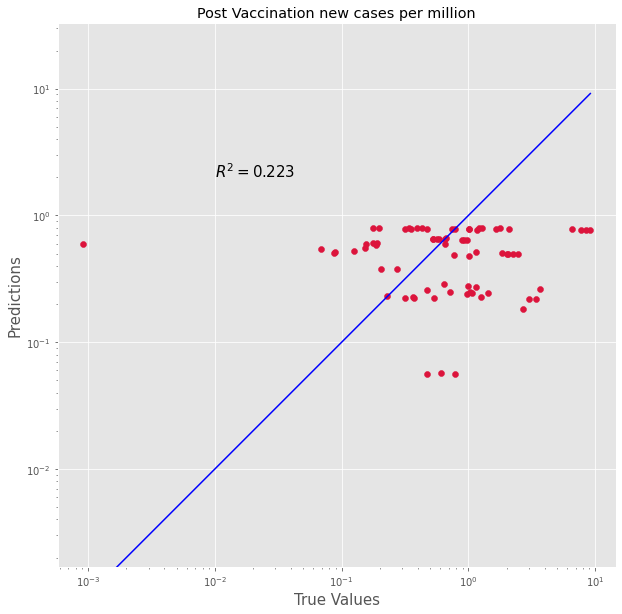

In [169]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

plt.title('Post Vaccination new cases per million')
plt.text(0.01, 2, r'$R^2 = 0.223$', fontsize=15)

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

## 2nd Part PCA

pre vac


In [170]:
pre_vac2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         901 non-null    object        
 1   date                             901 non-null    datetime64[ns]
 2   location                         901 non-null    object        
 3   total_deaths_per_million         901 non-null    float64       
 4   total_cases_per_million          901 non-null    float64       
 5   stringency_index                 901 non-null    float64       
 6   new_deaths_smoothed              901 non-null    float64       
 7   new_cases_smoothed               901 non-null    float64       
 8   new_cases_smoothed_per_million   901 non-null    float64       
 9   new_deaths_smoothed_per_million  901 non-null    float64       
 10  aged_65_older                    901 non-null    float64     

In [171]:
pre_vac2 = pre_vac2.drop(['iso_code', 'date', 'location', 'new_cases_smoothed','total_deaths', 'total_cases', 'new_deaths_smoothed', 'gdp_per_capita', 'diabetes_prevalence', 'median_age', 'population_density'], axis=1)
#, 'new_cases_smoothed_per_million', 'population', 'aged_65_older'

highly correlated variables removed as SEM model will have issues later on

In [172]:
#scale variables
scaled_pre_vac = StandardScaler().fit_transform(pre_vac2.values)
scaled_pre_vac = pd.DataFrame(scaled_pre_vac, index=pre_vac2.index, columns=pre_vac2.columns)

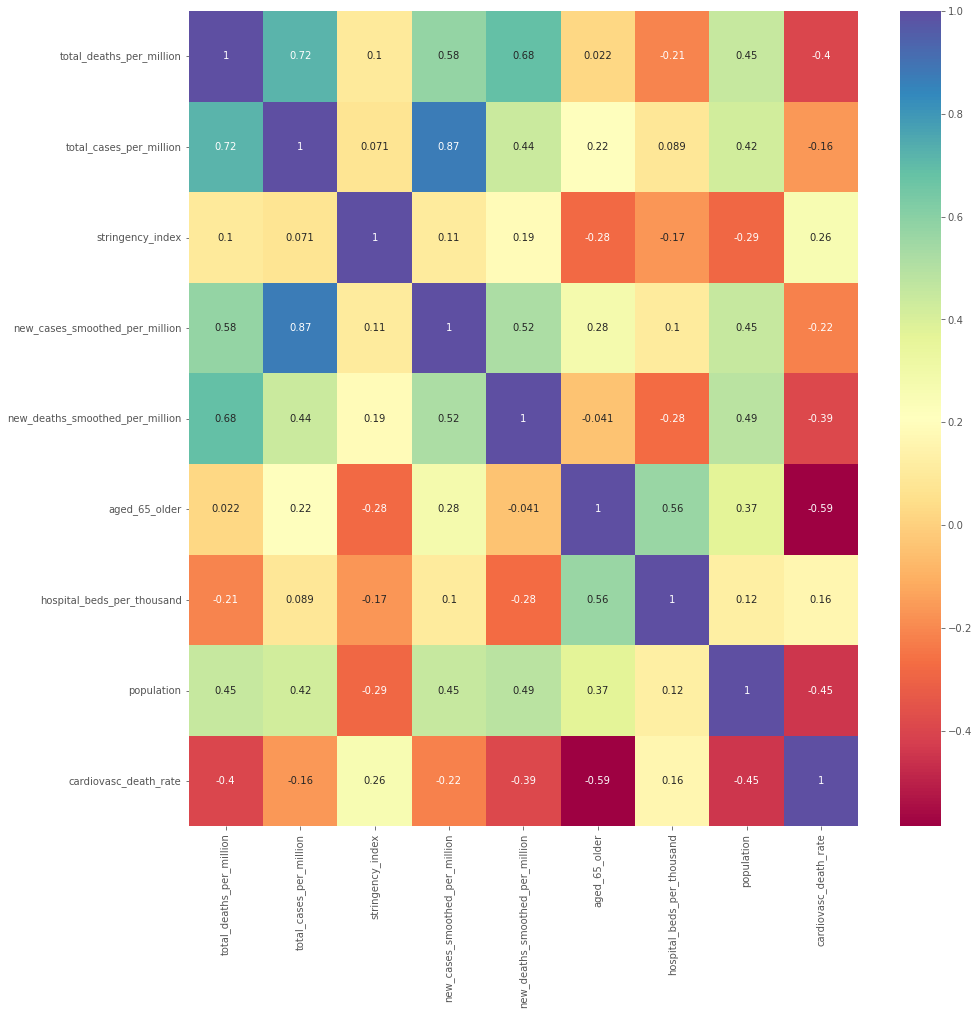

In [173]:
cormat = scaled_pre_vac.corr()
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(cormat, annot=True, cmap='Spectral')
plt.show()

In [174]:
#PCA
pca = PCA()
pre_vac_reduced = pca.fit_transform(scaled_pre_vac)

In [175]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([39.81, 62.17, 76.82, 85.39, 91.58, 95.39, 98.57, 99.45, 99.99])

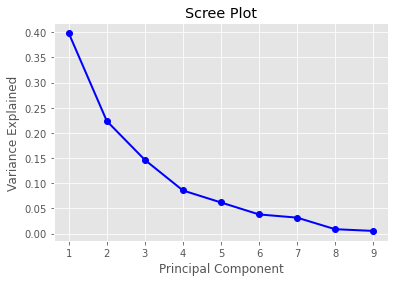

In [176]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

The elbow appears around PC 4 

In [177]:
pc_pre_vac = pd.DataFrame(np.transpose(abs( pca.components_ [0:4,:]), (1,0)), index=pre_vac2.columns, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pc_pre_vac

,PC1,PC2,PC3,PC4
total_deaths_per_million,0.435327,0.236398,0.052289,0.065892
total_cases_per_million,0.432512,0.082841,0.369510,0.178048
stringency_index,0.020421,0.440908,0.338100,0.704699
new_cases_smoothed_per_million,0.435305,0.054227,0.353167,0.047949
new_deaths_smoothed_per_million,0.389915,0.281305,0.183185,0.087045
aged_65_older,0.207297,0.573410,0.049180,0.433608
hospital_beds_per_thousand,0.001569,0.492604,0.525348,0.029379
population,0.381300,0.194322,0.159355,0.295783
cardiovasc_death_rate,0.305154,0.227074,0.533226,0.425575


In [178]:
pca.components_.T

array([[ 0.43532689, -0.23639763, -0.05228916,  0.06589248, -0.12591484,
        -0.67698901, -0.29987323, -0.15070024, -0.40090834],
       [ 0.43251238, -0.08284149,  0.36950962,  0.17804819, -0.36909538,
         0.01484226, -0.15024537,  0.43229144,  0.54030599],
       [-0.020421  , -0.44090768,  0.33810044, -0.7046991 ,  0.26046594,
         0.11362114, -0.32836637, -0.03910894,  0.06453238],
       [ 0.43530451, -0.05422679,  0.35316671,  0.04794911, -0.21162257,
         0.46702786,  0.30029198, -0.48957184, -0.29629143],
       [ 0.38991467, -0.28130468, -0.18318459, -0.08704475,  0.45323716,
        -0.11459885,  0.64709044,  0.29564773,  0.05486708],
       [ 0.2072967 ,  0.57340955,  0.04917992, -0.43360763, -0.113182  ,
         0.06443621, -0.01196202,  0.48052501, -0.43564408],
       [ 0.00156949,  0.49260439,  0.5253479 , -0.02937853,  0.34630149,
        -0.4304447 ,  0.15318506, -0.29644827,  0.25284449],
       [ 0.38129962,  0.19432186, -0.15935484,  0.29578264,  0

In [179]:
pca.explained_variance_

array([3.58721606, 2.01448928, 1.31961531, 0.7725381 , 0.55794146,
       0.34372286, 0.28653251, 0.07933339, 0.04861103])

In [180]:
pca.components_

array([[ 0.43532689,  0.43251238, -0.020421  ,  0.43530451,  0.38991467,
         0.2072967 ,  0.00156949,  0.38129962, -0.3051545 ],
       [-0.23639763, -0.08284149, -0.44090768, -0.05422679, -0.28130468,
         0.57340955,  0.49260439,  0.19432186, -0.2270736 ],
       [-0.05228916,  0.36950962,  0.33810044,  0.35316671, -0.18318459,
         0.04917992,  0.5253479 , -0.15935484,  0.53322624],
       [ 0.06589248,  0.17804819, -0.7046991 ,  0.04794911, -0.08704475,
        -0.43360763, -0.02937853,  0.29578264,  0.42557519],
       [-0.12591484, -0.36909538,  0.26046594, -0.21162257,  0.45323716,
        -0.113182  ,  0.34630149,  0.59057478,  0.21988647],
       [-0.67698901,  0.01484226,  0.11362114,  0.46702786, -0.11459885,
         0.06443621, -0.4304447 ,  0.32790612,  0.01873002],
       [-0.29987323, -0.15024537, -0.32836637,  0.30029198,  0.64709044,
        -0.01196202,  0.15318506, -0.49709618,  0.00795127],
       [-0.15070024,  0.43229144, -0.03910894, -0.48957184,  0

In [181]:
pc_pre_vac = pd.DataFrame(np.transpose(abs( pca.components_ [0:4,:]), (1,0)), index=pre_vac2.columns, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pc_pre_vac

,PC1,PC2,PC3,PC4
total_deaths_per_million,0.435327,0.236398,0.052289,0.065892
total_cases_per_million,0.432512,0.082841,0.369510,0.178048
stringency_index,0.020421,0.440908,0.338100,0.704699
new_cases_smoothed_per_million,0.435305,0.054227,0.353167,0.047949
new_deaths_smoothed_per_million,0.389915,0.281305,0.183185,0.087045
aged_65_older,0.207297,0.573410,0.049180,0.433608
hospital_beds_per_thousand,0.001569,0.492604,0.525348,0.029379
population,0.381300,0.194322,0.159355,0.295783
cardiovasc_death_rate,0.305154,0.227074,0.533226,0.425575


varimax: CFI(.84) TLI(.65) SRMR(0.1) <br/>
promax:  CFI(.83) TLI(.68) SRMR(0.1) <br/>
oblimin: CFI(.78) TLI(.57) SRMR(0.09)

**These values were obtained through the R-code**

In [182]:
rotator = Rotator(method='promax', normalize=True)
rotator.fit_transform(np.transpose(pca.components_[0:4,:]))

array([[ 0.27989813, -0.38416874,  0.02789779,  0.03246914],
       [ 0.59892835, -0.02046606,  0.1033753 ,  0.02944896],
       [ 0.18615412, -0.20395192, -0.11867536, -0.90831647],
       [ 0.56571122, -0.03012719, -0.00730653, -0.05196707],
       [ 0.13268887, -0.4908592 , -0.06101919, -0.06633634],
       [ 0.04529544,  0.2652428 , -0.71419835, -0.04259935],
       [ 0.34253573,  0.63408245, -0.21080687,  0.01215968],
       [ 0.15081067, -0.08990636, -0.09079189,  0.4579011 ],
       [ 0.2948656 ,  0.34940544,  0.65705111, -0.0402263 ]])

In [183]:
pre_vac_rot = pd.DataFrame(rotator.fit_transform(np.transpose(pca.components_[0:4,:])), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=pre_vac2.columns)
pre_vac_rot

,PC1,PC2,PC3,PC4
total_deaths_per_million,0.279898,-0.384169,0.027898,0.032469
total_cases_per_million,0.598928,-0.020466,0.103375,0.029449
stringency_index,0.186154,-0.203952,-0.118675,-0.908316
new_cases_smoothed_per_million,0.565711,-0.030127,-0.007307,-0.051967
new_deaths_smoothed_per_million,0.132689,-0.490859,-0.061019,-0.066336
aged_65_older,0.045295,0.265243,-0.714198,-0.042599
hospital_beds_per_thousand,0.342536,0.634082,-0.210807,0.012160
population,0.150811,-0.089906,-0.090792,0.457901
cardiovasc_death_rate,0.294866,0.349405,0.657051,-0.040226


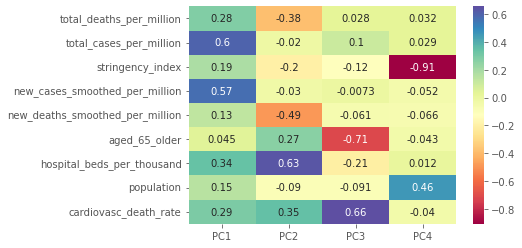

In [184]:
ax = sns.heatmap(pre_vac_rot, annot=True, cmap='Spectral')
plt.show()

### Post vac PCA

In [185]:
post_vac2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 1 to 3031
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         1517 non-null   object        
 1   date                             1517 non-null   datetime64[ns]
 2   location                         1517 non-null   object        
 3   total_deaths_per_million         1517 non-null   float64       
 4   total_cases_per_million          1517 non-null   float64       
 5   stringency_index                 1517 non-null   float64       
 6   new_deaths_smoothed              1517 non-null   float64       
 7   new_cases_smoothed               1517 non-null   float64       
 8   new_cases_smoothed_per_million   1517 non-null   float64       
 9   new_deaths_smoothed_per_million  1517 non-null   float64       
 10  aged_65_older                    1517 non-null   float64    

In [186]:
post_vac2 = post_vac2.drop(['iso_code', 'date', 'location', 'total_deaths', 'total_cases', 'new_cases_smoothed', 'new_deaths_smoothed', 'people_fully_vaccinated', 'population_density', 'median_age', 'gdp_per_capita', 'diabetes_prevalence', 'aged_65_older'], axis=1)

In [187]:
#scale variables
scaled_post_vac = StandardScaler().fit_transform(post_vac2.values)
scaled_post_vac = pd.DataFrame(scaled_post_vac, index=post_vac2.index, columns=post_vac2.columns)

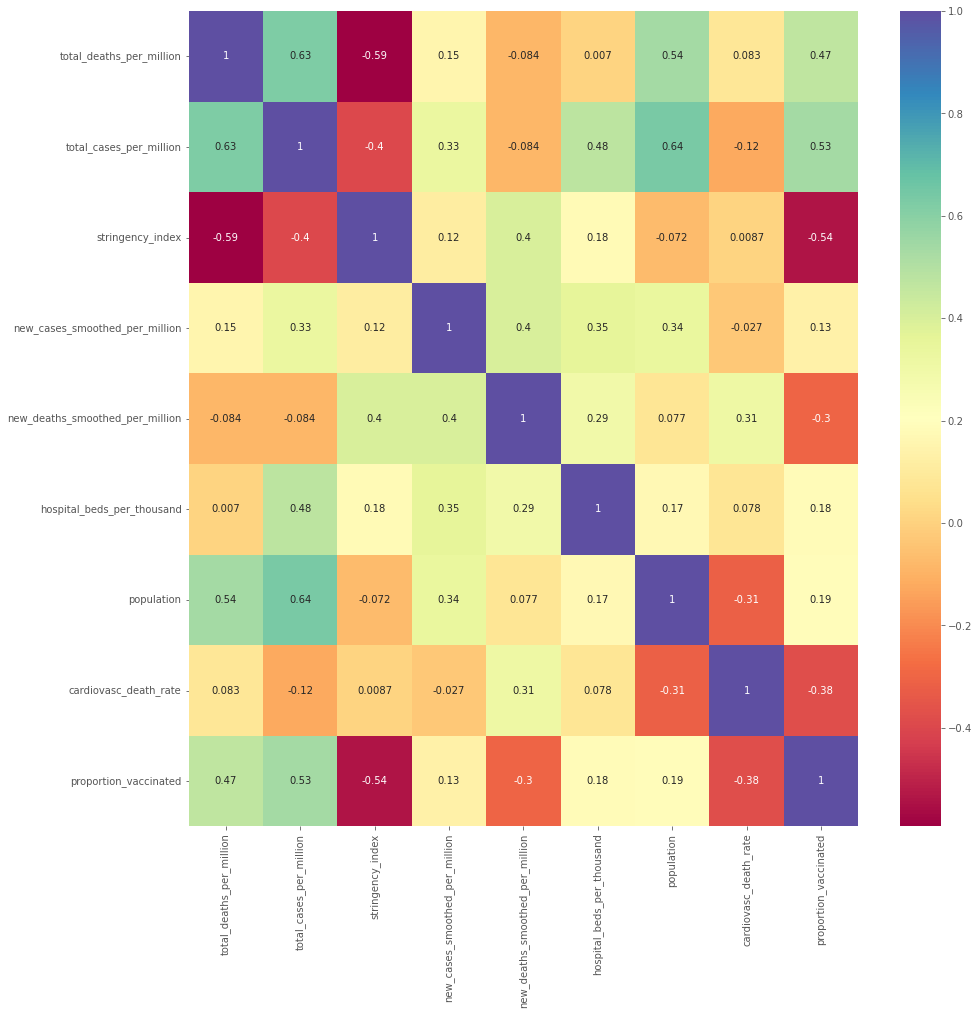

In [188]:
cormat = scaled_post_vac.corr()
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(cormat, annot=True, cmap='Spectral')
plt.show()

In [189]:
#PCA
pca = PCA()
post_vac_reduced = pca.fit_transform(scaled_post_vac)

In [190]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([34.43, 57.48, 71.33, 81.67, 89.17, 93.98, 96.93, 98.68, 99.99])

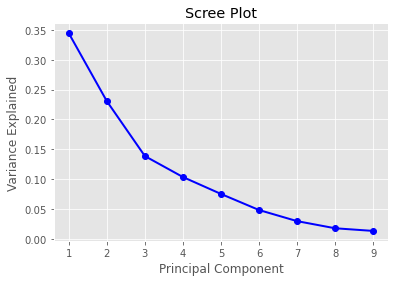

In [191]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

A bit of an elbow around PC3 however PC4 still explains quite alot of the variance.

In [192]:
pc_post_vac = pd.DataFrame(np.transpose(abs( pca.components_ [0:4,:]), (1,0)), index=post_vac2.columns, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pc_post_vac

,PC1,PC2,PC3,PC4
total_deaths_per_million,0.451441,0.055896,0.378446,0.292914
total_cases_per_million,0.503540,0.149220,0.032082,0.097942
stringency_index,0.342218,0.381126,0.349329,0.092932
new_cases_smoothed_per_million,0.189302,0.472879,0.085717,0.040144
new_deaths_smoothed_per_million,0.114542,0.547202,0.191365,0.140988
hospital_beds_per_thousand,0.164564,0.449322,0.054059,0.620670
population,0.381130,0.214310,0.198935,0.563955
cardiovasc_death_rate,0.159755,0.161338,0.793152,0.093877
proportion_vaccinated,0.422749,0.180162,0.134772,0.402982


varimax: CFI(.82) TLI(.60) SRMR(0.1) <br/>
promax:  CFI(.69) TLI(.41) SRMR(0.2) <br/>
oblimin: CFI(.89) TLI(.70) SRMR(0.07) 

**These values were obtained through the R-code**

In [193]:
rotator = Rotator(method='oblimin', normalize=True)
rotator.fit_transform(np.transpose(pca.components_[0:5,:]))

array([[ 4.36482550e-01, -3.72955204e-01,  2.96253488e-01,
         1.40086414e-01,  3.98662591e-02],
       [ 4.05596557e-01, -2.45735743e-01,  2.94699985e-02,
        -4.09422742e-01, -5.95224351e-02],
       [ 4.99448905e-02,  6.18531178e-01, -1.72009760e-01,
        -1.73032369e-01,  5.71355107e-02],
       [-1.77051326e-04, -8.81174050e-02, -8.53050583e-02,
         1.31554525e-02,  8.09660051e-01],
       [ 3.63544814e-02,  2.39436015e-01,  2.88128184e-01,
        -6.72533497e-03,  5.64298000e-01],
       [-2.04652091e-02,  3.92259669e-02,  5.65186237e-02,
        -8.67615238e-01, -3.06934859e-03],
       [ 7.78415282e-01,  1.31712030e-01, -1.41451522e-01,
         9.99117498e-03,  1.45981365e-02],
       [-9.20335294e-02, -7.24089355e-03,  8.31579583e-01,
        -7.56221290e-02, -1.34808646e-02],
       [-1.72096544e-01, -5.78635238e-01, -2.80464889e-01,
        -1.64348558e-01,  1.39397474e-01]])

In [194]:
post_vac_rot = pd.DataFrame(rotator.fit_transform(np.transpose(pca.components_[0:4,:])), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=post_vac2.columns)
post_vac_rot

,PC1,PC2,PC3,PC4
total_deaths_per_million,0.455046,-0.363996,0.272470,0.116121
total_cases_per_million,0.335290,-0.281629,-0.011180,-0.339288
stringency_index,-0.002406,0.589692,-0.181771,-0.079252
new_cases_smoothed_per_million,0.355163,0.204120,0.008418,-0.336984
new_deaths_smoothed_per_million,0.251752,0.412006,0.339574,-0.170376
hospital_beds_per_thousand,-0.080265,0.024338,0.041061,-0.773976
population,0.692000,0.076728,-0.199831,0.105201
cardiovasc_death_rate,-0.089037,-0.020426,0.823857,-0.019150
proportion_vaccinated,-0.051092,-0.472183,-0.239406,-0.342292


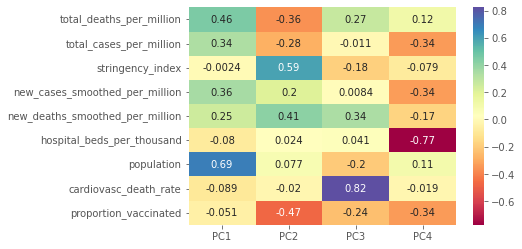

In [195]:
ax = sns.heatmap(post_vac_rot, annot=True, cmap='Spectral')
plt.show()